# Using Machine Learning Tools 2020
# Assignment 3: Deep Neural Networks

## Overview

In this assignment you will implement two types of deep learning network (fully connected and convolutional neural networks) to classify images of hands in poses corresponding to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train two different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore different cases of over-fitting and under-fitting, and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, and optimize performance. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General Instructions 

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, as indicated in this template.
 - Your code must use the current stable versions of python libraries, not outdated versions.
 - All data processing must be done within the notebook after loading the data.
 - Comment your code, so that its purpose is clear to the reader.
 - **Before submitting your notebook, make sure to run all cells in your final notebook so that it works correctly.**

This assignment is divided into several tasks. Stick to this notebook format, although feel free to add cells throughout, but keep the same numbering for all instructions, questions and answers.

Make sure to answer every question with *separate answer text (“Answer: ...”) in a cell* and check that you answered all sub-questions/aspects within the question. The text answers are worth points.

Make the *figures self-explanatory and unambiguous*. Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will establish how long a simple network takes to run on a given amount of training data on your computer. This is important for this assignment as you have to run on your own machines, and we need to make sure it runs in a reasonable amount of time. In a practical problem you are likely to have a lot more data and will use bigger networks, but it is common that you will have a limit on the available resources and time, so establishing a baseline timing and deciding on constraints is a very common task in any problem.

- Following this we will go through a few specific cases, looking at some extremes and learning to identify common problems, how to spot them and options for how to correct for them.

- Afterwards, the main bulk of the assignment will focus on tuning the networks to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore one extra aspect, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

## Your Details

<h3> 
Name: Arpit Garg <br/>
Id: A1784072</h3>

## Initialise environment

In [1]:
# Load libraries, etc.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# other libraries here
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
import tensorflow as tf
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,classification_report
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# fix the values
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [3]:
# version of tensorflow and keras
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [4]:
# class for formatting the print option
class color:
   PURPLE ='\033[95m'
   CYAN ='\033[96m'
   DARKCYAN ='\033[36m'
   BLUE ='\033[94m'
   GREEN ='\033[92m'
   YELLOW ='\033[93m'
   RED ='\033[91m'
   BOLD ='\033[1m'
   UNDERLINE ='\033[4m'
   END ='\033[0m'

---

## 1. Explore the Dataset (10%)

### 1.1 Load the data
 - We will use an MNIST-style dataset of sign language signals (hands), which are all small images (28x28)
 - Files are sign_mnist_train.csv and sign_mnist_test.csv
 - Split up labels and images
 - Reshape images appropriately

In [5]:
# loading the data
#training data
df_train = pd.read_csv('sign_mnist_train.csv')
#test data
df_test = pd.read_csv('sign_mnist_test.csv')

In [6]:
#shape of training data
print(color.CYAN,color.BOLD,'\n\nShape of Training Data:\n\n',color.END)
print(color.CYAN,color.BOLD,df_train.shape,color.END,'\n\n')
#top 10 entries of training data
df_train.head(10)

  

Shape of Training Data:

 
  (27455, 785)  




,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [7]:
#shape of testing data
print(color.CYAN,color.BOLD,'\n\n Shape of Testing Data: \n\n',color.END)
print(color.CYAN,color.BOLD,df_test.shape,color.END,'\n\n')
#top 10 entries of test data
df_test.head(10)

  

 Shape of Testing Data: 

 
  (7172, 785)  




,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [8]:
# separating labels
# for train
train_labels = df_train['label']
#for test
test_labels = df_test['label']
print(color.CYAN,color.BOLD,'\n\n Label Shape: \n\n',color.END)
print(color.CYAN,color.BOLD,train_labels.shape,color.END,'\n\n')
print(color.CYAN,color.BOLD,'\n\n First 10 values of Label: \n\n',color.END)
print(train_labels.head(10),'\n\n')

  

 Label Shape: 

 
  (27455,)  


  

 First 10 values of Label: 

 
0     3
1     6
2     2
3     2
4    13
5    16
6     8
7    22
8     3
9     3
Name: label, dtype: int64 




In [9]:
train_values = df_train.drop('label', axis = 1)
test_values = df_test.drop('label', axis = 1)
print(color.CYAN,color.BOLD,'\n\n Values Shape: \n\n',color.END)
print(color.CYAN,color.BOLD,train_values.shape,color.END,'\n\n')
print(color.CYAN,color.BOLD,'\n\n First ten values: \n\n',color.END)
train_values.head(10)

  

 Values Shape: 

 
  (27455, 784)  


  

 First ten values: 

 


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,...,76,74,68,62,53,55,48,238,255,255
6,134,134,135,135,136,137,137,138,138,138,...,109,102,91,65,138,189,179,181,181,179
7,114,42,74,99,104,109,117,127,142,152,...,214,218,220,223,223,225,227,227,228,228
8,169,174,176,180,183,185,187,188,190,191,...,119,118,123,120,118,114,94,74,61,57
9,189,189,189,190,190,191,190,190,190,189,...,13,53,200,204,201,201,193,175,178,156


In [10]:
#reshape
train_values = tf.reshape(train_values.values,shape=[-1,28,28])

In [11]:
# After reshaping
print(color.CYAN,color.BOLD,'\n\n After Reshaping:',color.END,'\n\n')
print(color.CYAN,color.BOLD,'Shape: ', color.END,'\n\n')
print(color.CYAN,color.BOLD,train_values.shape,color.END,'\n\n')
print(color.CYAN,color.BOLD,'Value: ', color.END,'\n\n')
print(train_values)

  

 After Reshaping:  


  Shape:   


  (27455, 28, 28)  


  Value:   


tf.Tensor(
[[[107 118 127 ... 170 170 169]
  [111 121 129 ... 171 171 170]
  [113 123 131 ... 171 171 171]
  ...
  [142 150 159 ... 202 201 200]
  [142 151 160 ... 204 203 202]
  [142 151 160 ... 204 203 202]]

 [[155 157 156 ... 138  92 108]
  [158 159 159 ... 142 116 143]
  [161 161 161 ... 147 125 140]
  ...
  [162 159 145 ...  91 101  94]
  [153 139 115 ...  97  95 120]
  [135 116  95 ... 103 135 149]]

 [[187 188 188 ...  66  77  83]
  [188 189 189 ...  73  73  71]
  [190 190 190 ...  74  68  61]
  ...
  [212 198 175 ... 195 193 192]
  [202 179 152 ... 195 194 193]
  [198 166 132 ... 195 194 195]]

 ...

 [[174 174 174 ... 160 158 156]
  [178 178 177 ... 162 160 158]
  [181 180 180 ... 164 162 161]
  ...
  [215 216 216 ... 201 199 198]
  [216 217 217 ... 201 200 198]
  [217 217 217 ... 202 200 200]]

 [[177 181 184 ... 181 179 177]
  [179 182 185 ... 183 181 179]
  [181 184 187 ... 185 183 182]
  ...
  [12

In [12]:
#reshape test
test_values = tf.reshape(test_values.values,shape=[-1,28,28])

In [13]:
# After reshaping
print(color.CYAN,color.BOLD,'\n\n After Reshaping:',color.END,'\n\n')
print(color.CYAN,color.BOLD,'Shape: ', color.END,'\n\n')
print(color.CYAN,color.BOLD,test_values.shape,color.END,'\n\n')
print(color.CYAN,color.BOLD,'Value: ', color.END,'\n\n')
print(test_values)

  

 After Reshaping:  


  Shape:   


  (7172, 28, 28)  


  Value:   


tf.Tensor(
[[[149 149 150 ... 150 150 149]
  [150 150 150 ... 151 150 151]
  [150 151 151 ... 151 151 152]
  ...
  [ 69  69  77 ... 116 113 118]
  [ 74  75  76 ... 110 116 113]
  [ 75  74  74 ... 112 120 107]]

 [[126 128 131 ... 133 134 132]
  [129 132 134 ... 136 136 134]
  [133 135 138 ... 140 139 138]
  ...
  [173 174 177 ... 184 182 181]
  [172 174 177 ... 184 182 181]
  [172 174 177 ... 184 182 180]]

 [[ 85  88  92 ... 182 181 178]
  [ 86  88  93 ... 183 181 179]
  [ 86  89  93 ... 185 183 181]
  ...
  [ 91  94  97 ... 224 222 221]
  [ 90  92  96 ... 225 224 222]
  [ 89  91  94 ... 225 224 222]]

 ...

 [[190 191 190 ... 185 184 183]
  [193 193 193 ... 186 185 184]
  [195 194 195 ... 187 186 187]
  ...
  [214 215 213 ... 208 208 208]
  [214 215 209 ... 209 208 207]
  [215 215 207 ... 211 209 208]]

 [[201 205 208 ... 239 239 239]
  [206 209 212 ... 242 242 242]
  [210 214 216 ... 246 245 244]
  ...
  [255

In [14]:
# Bin Count distribution
# Training
print(color.CYAN,color.BOLD,'\n For Training: \n',color.END)
print(color.CYAN,color.BOLD,'Labels: \n %s \n' % np.unique(train_labels),color.END)
print(color.CYAN,color.BOLD,'Class Distribution:\n  %s \n' % np.bincount(train_labels),color.END)
# Tesing
print(color.CYAN,color.BOLD,'\n For Testing \n',color.END)
print(color.CYAN,color.BOLD,'Labels: \n %s \n' % np.unique(test_labels),color.END)
print(color.CYAN,color.BOLD,'Class Distribution:\n %s \n' % np.bincount(test_labels),color.END)

  
 For Training: 
 
  Labels: 
 [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
 
  Class Distribution:
  [1126 1010 1144 1196  957 1204 1090 1013 1162    0 1114 1241 1055 1151
 1196 1088 1279 1294 1199 1186 1161 1082 1225 1164 1118] 
 
  
 For Testing 
 
  Labels: 
 [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
 
  Class Distribution:
 [331 432 310 245 498 247 348 436 288   0 331 209 394 291 246 347 164 144
 246 248 266 346 206 267 332] 
 


In [15]:
#Removing ambiguity of label 9 
for n in range(len(train_labels)):
    if train_labels[n]>8:
        train_labels[n] = train_labels[n] - 1
for n in range(len(test_labels)):
    if test_labels[n]>8:
        test_labels[n] = test_labels[n] - 1
print(color.CYAN,color.BOLD,'\n Updated Training Labels: \n', color.END)
print(color.CYAN,color.BOLD,np.unique(train_labels), color.END)
print(color.CYAN,color.BOLD,'\n Updated Testing Labels: \n', color.END)
print(color.CYAN,color.BOLD,np.unique(test_labels), color.END)

  
 Updated Training Labels: 
 
  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 
  
 Updated Testing Labels: 
 
  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 


### 1.2 Look at the data
- Print out some descriptive information about the dataset
- Show one example image of each class

  

Labels Possible:  


  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]  


  
Count Plot:  




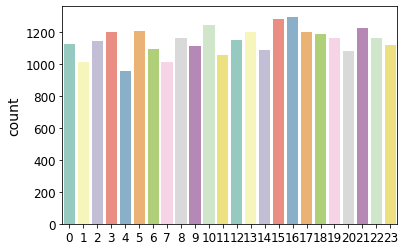

In [16]:
print(color.CYAN,color.BOLD,'\n\nLabels Possible:',color.END,'\n\n')
print(color.CYAN,color.BOLD,np.unique(np.array(df_train['label'].values)),color.END,'\n\n')
print(color.CYAN,color.BOLD,'\nCount Plot:',color.END,'\n\n')
sns.countplot(x=df_train['label'].values, palette="Set3")

In [17]:
print(color.CYAN,color.BOLD,'\n\n Description Table:',color.END,'\n\n')
df_train.describe()

  

 Description Table:  




,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,11.679476,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,6.880558,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,12.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,18.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,23.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [18]:
#need to include description
print(color.CYAN,color.BOLD,'\n\n Training Value Shape: ', color.END,'\n\n')
print(color.CYAN,color.BOLD,train_values.shape,color.END,'\n\n')

  

 Training Value Shape:   


  (27455, 28, 28)  




In [19]:
print(color.CYAN,color.BOLD,'\n\n Training Label Shape: ', color.END,'\n\n')
print(color.CYAN,color.BOLD,train_labels.shape,color.END,'\n\n')

  

 Training Label Shape:   


  (27455,)  




In [20]:
print(color.CYAN,color.BOLD,'\n\n Testing Value Shape: ', color.END,'\n\n')
print(color.CYAN,color.BOLD,test_values.shape,color.END,'\n\n')

  

 Testing Value Shape:   


  (7172, 28, 28)  




In [21]:
print(color.CYAN,color.BOLD,'\n\n Testing Label Shape: ', color.END,'\n\n')
print(color.CYAN,color.BOLD,test_labels.shape,color.END,'\n\n')

  

 Testing Label Shape:   


  (7172,)  




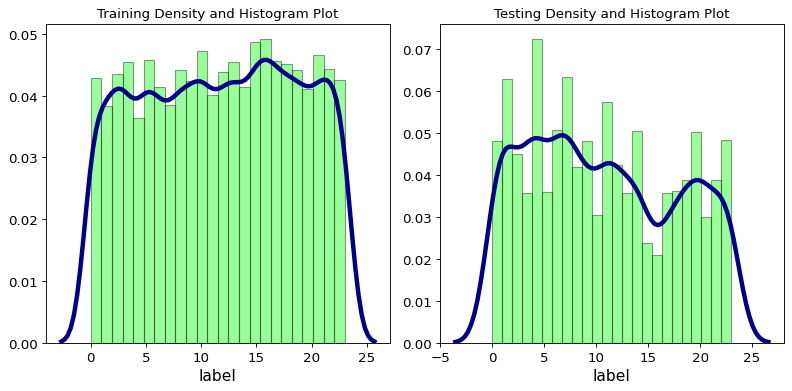

In [22]:
# Density Plot and Histogram of all test labels
from matplotlib.pyplot import figure
figure(num=None, figsize=(10,5), dpi=80)
plt.subplot(1,2,1)
sns.distplot(train_labels, hist=True, kde=True, 
             bins = 24 ,color = (0,1,0,1), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color':'darkblue'})
plt.title("Training Density and Histogram Plot")
plt.subplot(1,2,2)
sns.distplot(test_labels, hist=True, kde=True, 
             bins = 24 ,color = (0,1,0,1), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color':'darkblue'})
plt.title("Testing Density and Histogram Plot")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

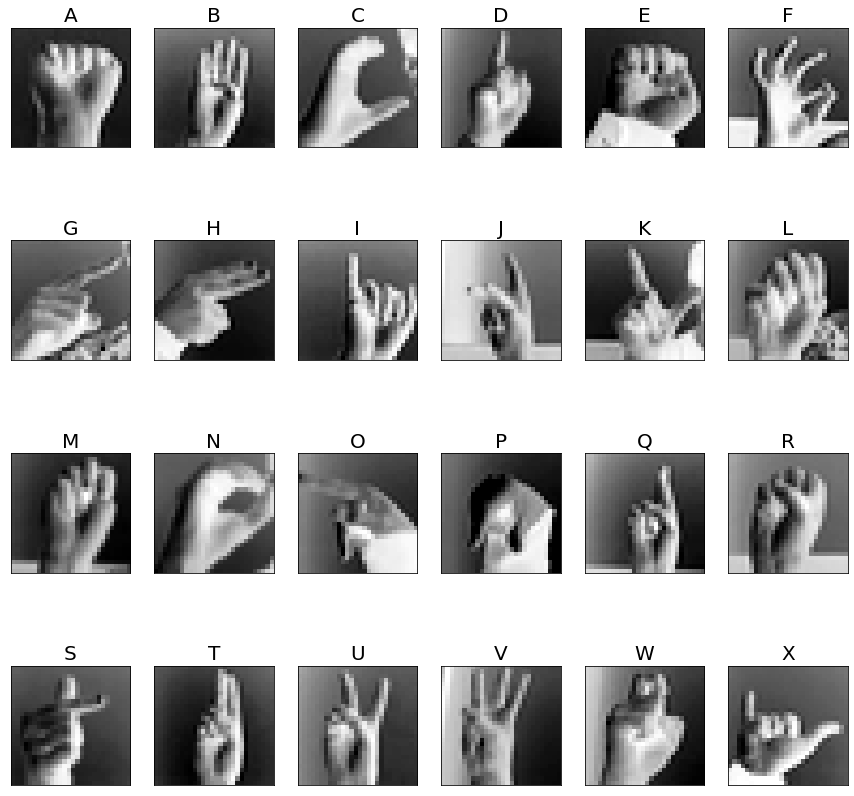

In [23]:
plt.figure(figsize=(15,15))
count = 0
for i in range(0,25):
    for n in range(0,27455):
        if(df_train.iloc[df_train.index[n],df_train.index[0]]==i):
            plt.subplot(4,6,count+1)
            plt.xticks([])
            plt.yticks([])
            plt.title(chr(65+i),fontsize=20)
            img = np.array(df_train.iloc[df_train.index[n],1:].to_frame().T)
            plt.imshow(img.reshape(28,28),cmap='Greys')
            count = count + 1
            break
plt.show

### Question 1.3
- Which pair of classes do you think will be the most difficult to distinguish?  Give a reason for your answer.

<font size=3>As we can analyze from the above images that some of the images are very similar and due to this it's hard to distinguish some images. E and S have similar gesture similarly there is no clear difference between M and N. Some of the images are also not clear for this plot like X. But these analysis are based on this plot. If we go on priniting and compare the images there might be the chance that we can distinguish clearly between these letters also. T and G, Y and I are almost same. All these are compared on the basis of similarity between the images and some are based on poor image quality in this case.</font>



### 1.4 Look at the labels
- Look at the distribution of the labels
- Adjust for anything that could cause problems later on

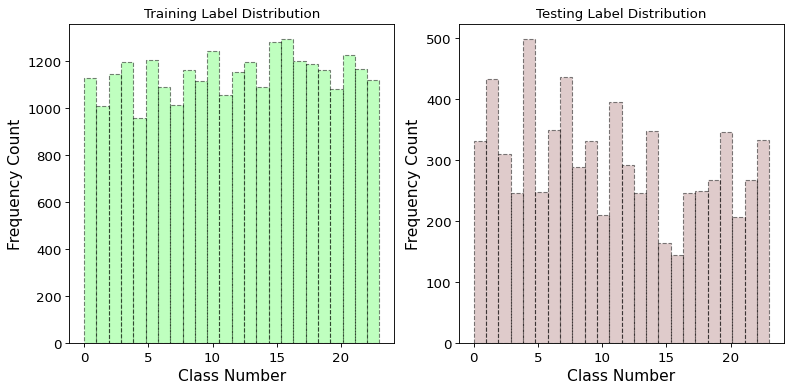

In [24]:
# histogram
figure(num=None, figsize=(10,5), dpi=80)
plt.subplot(1,2,1)
plt.hist(train_labels.values, bins=24,facecolor=(0,1,0,0.25), ls='dashed', lw=1, edgecolor = (0,0,0,0.5))
plt.title('Training Label Distribution')
plt.ylabel('Frequency Count')
plt.xlabel('Class Number')
plt.subplot(1,2,2)
plt.hist(test_labels, bins=24,facecolor=(0.5,0.2,0.2,0.25), ls='dashed', lw=1, edgecolor = (0,0,0,0.5))
plt.title('Testing Label Distribution')
plt.ylabel('Frequency Count')
plt.xlabel('Class Number')
plt.tight_layout()
plt.show()

In [25]:
#using label encoding to try this in last part of the assignment
label_binarizer= LabelBinarizer()
labels = label_binarizer.fit_transform(df_train['label'].values)
print(color.CYAN,color.BOLD,'\n Shape:',color.END,'\n\n')
print(color.CYAN,color.BOLD,labels.shape,color.END,'\n\n')

  
 Shape:  


  (27455, 24)  




### 1.5 Split the data (test, validation and training) and scale it
- We will only take the first 2500 training images (which is still over 100 per class) in order to keep run-times down and to make training more challenging. In a practical situation you might either have less data than you'd like or limitations on how much can be processed, so this also reflects a common real-life constraint.
- In this case we will create both the validation and test sets from the testing dataset.  It is unusual to do this, but in this case the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent. 
- Take 1000 images each for the validation and test sets.
- Scale the data appropriately (e.g. as done for other MNIST datasets).

In [26]:
# training data
# first 2500 values for training
X_train = train_values[:2500,:,:]
y_train = train_labels[:2500]
#printing shape
print(color.CYAN,color.BOLD,'\n\n Number of rows for values ad label: \n\n', color.END)
print(color.CYAN,color.BOLD,'Value rows:',X_train.shape[0],color.END,'\n\n')
print(color.CYAN,color.BOLD,'Label rows:',y_train.shape[0],color.END,'\n\n')
# displaying first 5 labels 
print(color.CYAN,color.BOLD,'Values are:\n\n', color.END)
print(y_train.head(5))

  

 Number of rows for values ad label: 

 
  Value rows: 2500  


  Label rows: 2500  


  Values are:

 
0     3
1     6
2     2
3     2
4    12
Name: label, dtype: int64


In [27]:
#testing and cross-validation data
#taking 1000 values in both
X_cv = test_values[:1000]
y_cv = test_labels[:1000]
X_test = test_values[1001:2001]
y_test = test_labels[1001:2001]
print(color.CYAN,color.BOLD,'\n\n Shape of testing values ad label: \n\n', color.END)
print(color.CYAN,color.BOLD,'Value Shape:', X_test.shape, color.END)
print(color.CYAN,color.BOLD,'Label Shape:', y_test.shape, color.END)
print(color.CYAN,color.BOLD,'\n\n Number of rows of validation values ad label: \n\n', color.END)
print(color.CYAN,color.BOLD,'Value Shape:', X_cv.shape, color.END)
print(color.CYAN,color.BOLD,'Label Shape:', y_cv.shape, color.END,'\n\n')

  

 Shape of testing values ad label: 

 
  Value Shape: (1000, 28, 28) 
  Label Shape: (1000,) 
  

 Number of rows of validation values ad label: 

 
  Value Shape: (1000, 28, 28) 
  Label Shape: (1000,)  




In [28]:
#scaling normalisation all values between 0 and 1
X_train = X_train / 255
X_cv = X_cv / 255
X_test = X_test / 255

In [29]:
#One hot encoding
y_otrain = label_binarizer.fit_transform(y_train)
y_ocv = label_binarizer.fit_transform(y_cv)
y_otest = label_binarizer.fit_transform(y_test)

In [30]:
#creating class name list from A to Z discarding J and Z
class_names = list()
for i in range(0,25):
    if (i != 8):
        a = chr(i+65)
        class_names.append(a) 
class_names = np.asarray(class_names)

In [31]:
#defining a class to retutn the class number -- for one hot encoding
def print_class(x):
    count = 0
    for i in x:
        if(i==0):
            count = count + 1
        else:
            return count

<dtype: 'float64'>
  

 Label:  S  




Text(0.5, 1.0, 'Sample S')

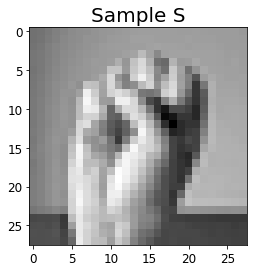

In [32]:
#checking type 
print(X_train.dtype)
# Look at tenth item
print(color.CYAN,color.BOLD,'\n\n Label: ',class_names[y_train[10]],color.END,'\n\n')
plt.imshow(X_train[10,:,:], cmap='gray')
plt.title('Sample '+class_names[y_train[10]], fontsize=20)

<b><br /><br />
Note: 
    
Scikitlearn suggests using OneHotEncoder for X matrix i.e. the features you feed in a model, and to use a LabelBinarizer for the y labels.

They are quite similar, except that OneHotEncoder could return a sparse matrix that saves a lot of memory and you won't really need that in y labels.

(Only using in last part of assignment)
</b>

### 1.6 Look at label distribution
- Check the label distribution in all three sets and if there are problems, change the selection above.

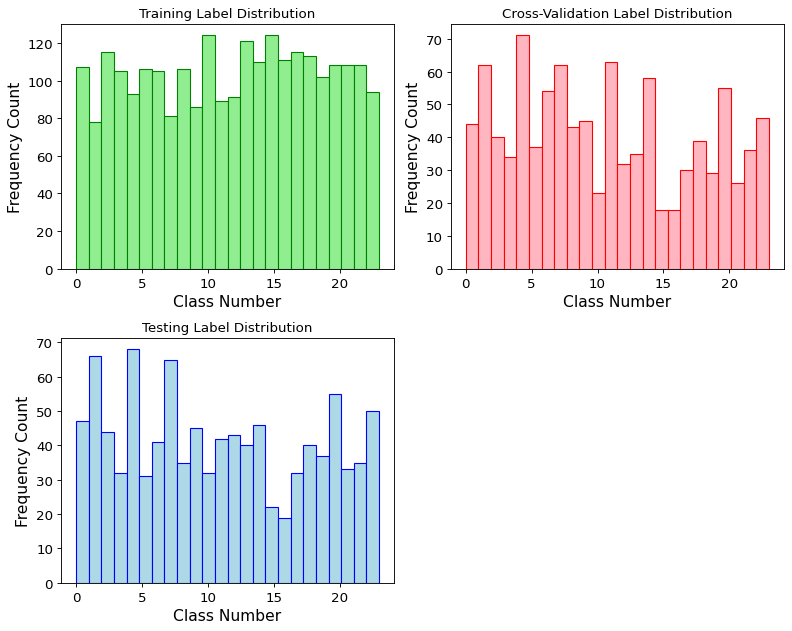

In [33]:
# histogram
# change the bins to 24
figure(num=None, figsize=(10,8), dpi=80)
plt.subplot(2,2,1)
plt.title('Training Label Distribution')
plt.hist(y_train, color = 'lightgreen', ec = 'green', bins = 24)
plt.ylabel('Frequency Count')
plt.xlabel('Class Number')
plt.subplot(2,2,2)
plt.title('Cross-Validation Label Distribution')
plt.hist(y_cv, color = 'lightpink', ec = 'red', bins = 24)
plt.ylabel('Frequency Count')
plt.xlabel('Class Number')
plt.subplot(2,2,3)
plt.title('Testing Label Distribution')
plt.hist(y_test, color = 'lightblue', ec = 'blue', bins = 24)
plt.ylabel('Frequency Count')
plt.xlabel('Class Number')
plt.tight_layout()
plt.show()

<b>Observation:</b><br />
    Distribution of Training Label is almost uniform as we can see from the above diagram. As we have taken that validation set from the test set so they both are similar in nature and not uniform. 

***

## 2. Initial Deep Learning Networks (30%)

In this section you will look at a variety of networks with this data and explore various settings and outcomes.

### Question 2.1
 - We will treat this as a classification problem but we could formulate it as a regression problem instead (predicting the label values as the outcomes). Name one disadvantage that a regression approach would have.

Answer question 2.1 here (no code required)


<b>If we are using classification we are penalizing the output to be in one of the label. While using the regressor we will get the value and there might be some ambiguity while mapping that value to one of the labels.

<br />
Basically, in a multi-class scenario, we would typically aim for a way to rank the most probable class, not just get a score per binary classifier; this premise is kind of implied in the term. However, naively comparing the scores of separate binary classifiers may easily turn out irrelevant to correct ranking, due to imbalances between the classes. Unfortunately, accomplishing a good ranking among the results of each binary classifier is not straightforward, although some methods exist. </b> 
<br />
For example: Suppose A, E and S have similar image data so regressor will predict approximately same value so it might be difficult for a regressor to assign label to this value.  
<br />
If we use any regressor there may be a issue in distinguihing between letters. 
Regressor works on continous if we apply on this to predict the label then it will not be able to find the difference between classes. 

### Question 2.2
 - What is chance level accuracy (e.g. if predictions were completely random) in this case?

# Answer question 2.2 here (no code required)
The performance of a random classifier depends on the fraction of times it predicts positive, e.g. P(y^=1). A random model essentially means a model whose predictions y^ are independent of the true label y, which means:

<center><br /><b>P(y^=1 | y=1)=P(y^=1),</b></center>
<br/>

and

<br /><b><center>P(y=1 | y^=1)=P(y=1).</center><br /></b>

The probability of being right, that is the expected accuracy is then:

<br /><b><center>P(y^=y)=P(y^=1)P(y=1)+P(y^=0)P(y=0).</center><br /></b>

If the dataset is imbalanced, then the 'random' model with the best expected accuracy is the one that always predicts the majority class, with expected accuracy equal to the fraction of data in the majority class.

Lets say a classifier classifies objects into k classes. In our case k is 24. Then, a random guess will choose one out of the k (24) classes and assign that class to the object. Now, what will be the expected accuracy of this random guessing. Simply use the logic that, as it has a probability to choose the correct class 1/k (1/24) for each object and no decision influence another, therefore the whole expected accuracy is 100/k %  (100/24 %).

Now, we know that when a classifier is trained “enough”, it will converge to its accuracy rate. So, we can assume there is a accuracy rate p% for the classifier.

Now, we have to make sense of the concept of significantly being better. Clearly, we can take best case comparisons, worst case comparisons and then comparison as in a hypothesis test.

If you consider best case for the random choice, we will see that, it can achieve the 100% accuracy with a very low probability, which you can not quite certainly say for your classifier; it may never reach 100% accuracy. But clearly best case comparison is a bad idea as it does not consider the probability of the event happening.

Similar idea can be conveyed with idea about worst case comparison where your classifier will be better as it can never get all of them wrong with certainty.

Now, consider the hypothesis testing. Here, your null hypothesis will be that the mean of the distribution of random guess, which is 1/k is greater than equal to your classifier’s accuracy, which we will take as a constant. The alternative is obviously that it is more than the random.

This can be then solved using t-test, using the approximation that any mean will approach a normal distribution and therefore, well, it should be greater than 100/k+ some constant.



<b>Consider a classifier of our case. So in this case, there are 24 possible outputs from 0–25. So a random guessing will give you correct answer with a probability of 4%. Any output other than required label will have the probability of not a required label is 96% and probability of a label is 4%). </b>




The main issue is with highly imbalanced datasets (say 99% negative). In this you are likely to end up with trivial models , that is a model which always predicts the majority class (negative) and achieves high accuracy (99%) so this useless model actually looks good. If you use a poor scoring function (such as accuracy) when optimizing hyperparameters you are quite likely to obtain a very bad model in imbalanced settings.

This is one of the many reasons why discrete measures like accuracy should be avoided. We won't have such issues with measures like area under the ROC or PR curve.

### 2.3 Timing Test
 - We will start to work out how long it takes to train a moderately sized network on your machine
 - Build a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - MaxPooling layer following this
   - Second Conv2D layer with 128 filters
   - Dense output layer after this
 - Set the number of epochs to **20** this time (we will use early stopping methods later but **not** now)
 - Set the batch size to 50
 - Use the *Adam* optimiser, with its default learning rate (we will use the Adam optimiser throughout this assignment)
 - Use the *ELU* activation function for the hidden layers (this will be used throughout)
 - Training/Validation/Testing set sizes are 2500/1000/1000, as described above
 - Use time.time() to determine how long it takes to train your network
 - Plot your learning curves (loss functions and accuracies for training and validation)
 - Calculate the accuracies of the network on both the validation and test datasets
 
If this run takes less than 10 minutes then continue with these settings. If it takes much longer than 10 minutes then reduce the number of training points until it is close to 10 minutes. In the case that you cannot achieve this without reducing the number of training points to less than 250, please contact a course organiser, as you may need to use alternative computational resources.

In [34]:
# Some key parameters
n_train = 2500
n_valid = 1000
n_test = 1000
# Define the number and size of hidden layers
hiddensizes = [64, 128]
# Define the activation function to be used by hidden layers
actfn = "elu"
# Optimiser and learning rate
optimizer = keras.optimizers.Adam
learningrate = 0.001   # ADAM default value
# Set size of batch and number of epochs
batch_size = 50
n_epochs = 20

In [35]:
# Reshape the data to be shape [Nx, Ny, 1]  (previously 2D was fine, but for CNN we need depth too)
X_train = tf.reshape(X_train, shape=[-1, 28, 28, 1])
X_cv = tf.reshape(X_cv, shape=[-1, 28, 28, 1])
X_test = tf.reshape(X_test, shape =[-1, 28, 28, 1])

In [36]:
# Convolution Neural Network structure
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    model.add(keras.layers.Dense(24, activation = "softmax"))  # always have 24 classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(lr=learningrate), metrics=["accuracy"])   
    return model

In [37]:
# function to run the model and calculate score and accuracy
def do_all(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size):
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_cv, y_cv))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    return (max_val_acc, testres[1], history, model)

In [38]:
# Plot the results (shifting validation curves appropriately)
def plot_history(history, title):
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.title(title, fontsize=20)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.show() 

Train on 2500 samples, validate on 1000 samples
Epoch 1/20
2500/2500 [==============================] - 10s 4ms/sample - loss: 2.4909 - accuracy: 0.2956 - val_loss: 1.5969 - val_accuracy: 0.5470
Epoch 2/20
2500/2500 [==============================] - 8s 3ms/sample - loss: 0.9951 - accuracy: 0.6992 - val_loss: 1.0155 - val_accuracy: 0.6900
Epoch 3/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.5389 - accuracy: 0.8448 - val_loss: 0.8554 - val_accuracy: 0.7280
Epoch 4/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.3515 - accuracy: 0.9024 - val_loss: 0.8242 - val_accuracy: 0.7420
Epoch 5/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.2497 - accuracy: 0.9348 - val_loss: 0.7150 - val_accuracy: 0.7820
Epoch 6/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.1961 - accuracy: 0.9408 - val_loss: 0.7325 - val_accuracy: 0.7910
Epoch 7/20
2500/2500 [==============================] - 7s 3ms/sample - los

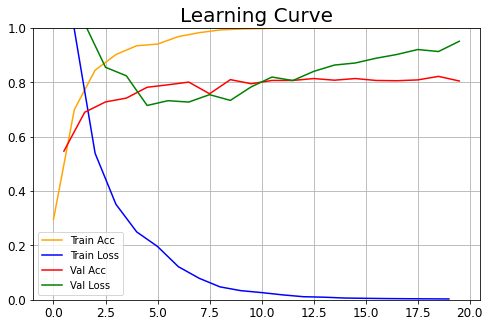

In [39]:
start_time = time.time()
valacc, testacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size)
print(color.RED,color.BOLD,"\n\n Time to run the model:--- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
plot_history(history, 'Learning Curve')

<br /><br /><b>Observation: </b>From the above learning curve we can state that in less than 12.5 epochs only training accuracy reached 1 and training loss converges. Validation  accuracy also reached more than 0.8 but validation loss not converges. 

In [40]:
# Printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________


  [20  6  0] 
  ['V' 'G' 'A'] 
  

 Predicted Label of the image:  
  V 


Text(0.5, 1.0, 'Sample Image')

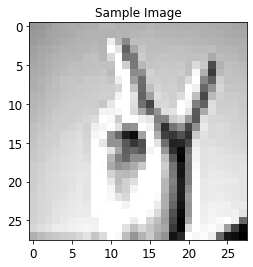

In [41]:
# We can inspect the output class predictions
y_pred = model.predict_classes(X_test[:3])  # use the first three test cases as an example
print(color.RED,color.BOLD,y_pred,color.END)   # predicted classes
#print(class_names[y_pred])   # names of these classes (prediction)
print(color.RED,color.BOLD,class_names[y_test[:3]],color.END)   # names of true classes
# Display an image of the first test sample
plt.imshow(tf.reshape(X_test[0], shape=[28,28]), cmap="gray")
print(color.RED,color.BOLD,'\n\n Predicted Label of the image: ', color.END)
print(color.RED,color.BOLD,class_names[y_test.iloc[0]],color.END)
plt.grid(False)
plt.title('Sample Image')

In [42]:
# Printing scores
print(color.RED,color.BOLD,'\n\n Vaidation Accuracy: ',valacc,color.END)
print(color.RED,color.BOLD,'\n\n Testing Accuracy: ',testacc,color.END,'\n\n')
print(color.RED,color.BOLD,'\n\n Model Score: ',model.evaluate(X_test,y_test),color.END)

  

 Vaidation Accuracy:  0.822 
  

 Testing Accuracy:  0.796  


1000/1000 [==============================] - 1s 947us/sample - loss: 1.0041 - accuracy: 0.7960
  

 Model Score:  [1.0041195964813232, 0.796] 


### 2.4 Initial Network Exploration
- We will now look at a couple of imperfect cases to get a feeling for what happens in different training situations

### Question 2.5
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

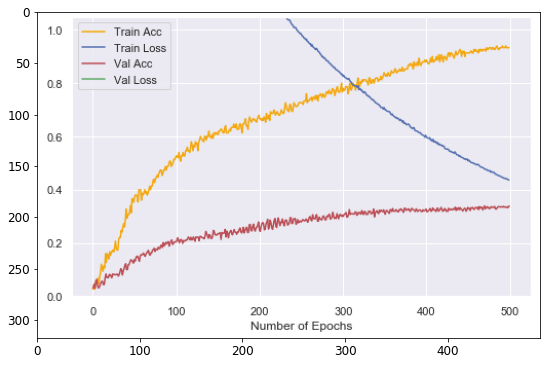

In [43]:
im = plt.imread('LearningPlot1.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

## Answer question 2.5 here (no code required)
1. Noisy: It is clear from the graph as it is fulctuating at every point so it contains noise. 
2. Overfit: As we can see the large difference between training accuracy and validation accuracy which is a clear indication of overfit.
From the graph we can see that training accuracy is increasing but there is not much improvement in validation accuracy and losses are not present in the graph so they could be very high.
3. Not Converged: From the loss function we can see that this is not converged

<b>Comparison with our CNN learning Curve:</b><br />
Let's say Learning curve graph we got from CNN model case 1 and the above mentioned graph be case 2.

While comparing case 1 with case 2, we can see the clear difference between noisy and not noisy graph. We can conclude that in case 2 graph is noisy and in the case 1, training accuracy and validation accuracy have less gap but in case 2 there is a large gap between training accuracy and validation accuracy which means overfitting. In case 1 plotted graph is converged as we can see the training loss but this is not the scenario for the case 2.


### Question 2.6
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

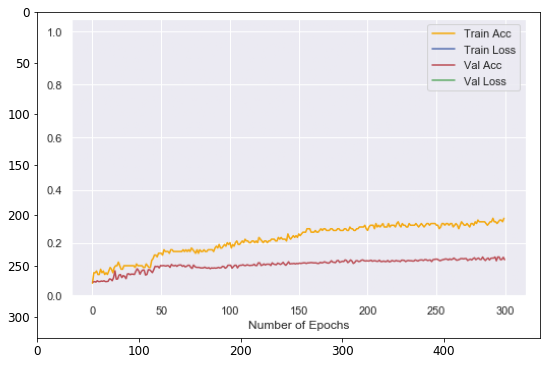

In [44]:
im = plt.imread('LearningPlot2.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

## Answer question 2.6 here (no code required)
1. Noisy: It is clear from the graph as it is fulctuating at every point so it contains noise. 
2. Underfit: It can be observed that training accuracy is very low and as compared with validation acuracy it is very low (less than 0.2) which is a result of underfitting

<b>Comparison with our CNN learning Curve:</b><br />
Let's say Learning curve graph we got from CNN model case 1 and the above mentioned graph be case 2.

While comparing this graph from case 1 we can see the clear difference between noisy and not noisy graph. We can conclude that in this case graph is noisy. And we can compare the training and validation accuracy plot and its clearly below 0.4 which is a case of underfitting which is not the issue in case 1.

### Question 2.7
 - Name something that you could do to alleviate problems due to (a) overfitting and (b) underfitting. Provide separate answers for (a) and (b).

### Answer question 2.7 here (no code required)<br />
<b>
    <br /><br />
<img src="https://i.ibb.co/zX8tKnV/2.png" alt="2" border="0">

<br /><br />

<h3>We can hadle overfitting in the following ways:</h3><br />
<li>
<ol>In improving the model we could simply upgrade model by reducing the complexity. We can simply remove layers or reduce the number of neurons in order to make our network smaller. </ol><br />
<img src="https://i.ibb.co/VHYNp3q/5.png" alt="5" border="0"><br />
<ol>Dropout Layers can be an easy and effective way to prevent overfitting in the models. A dropout layer randomly drops some of the connections between layers. This helps to prevent overfitting, because if a connection is dropped, the network is forced to Luckily.</ol><br />
<img src="https://i.ibb.co/t43BNGt/6.png" alt="6" border="0"><br />
<ol>Another way to prevent overfitting is to stop your training process early: Instead of training for a fixed number of epochs, you stop as soon as the validation loss rises — because, after that, your model will generally only get worse with more training. </ol><br />
<img src="https://i.ibb.co/5GVYNMg/4.png" alt="4" border="0"><br />
<br />
<ol>That is a lot of features for only very few training samples. So, instead of using all features, it’s better to use only the most important ones. This will, on the one hand, make the training process notably faster, on the other hand, it can help to prevent overfitting because the model doesn’t need to learn as many features.One of the simplest ways to select relevant features is to calculate the F-Score for each feature or recursice feature elimination.</ol><br />
<img src="https://i.ibb.co/sb33C7D/7.png" alt="7" border="0"><br />
<ol>Data Augmentation: As a result, another technique called data augmentation comes into the picture. Instead of giving loads of data, improvising and reworking on the existing data can go a long way in reducing overfitting. </ol><br />
<img src="https://i.ibb.co/vhVQ69h/8.png" alt="8" border="0"><br />
</li>

<h2>Handling Underfitting</h2>

This problem can be alleviated by simply using more data for the project. In addition, the following ways can also be used to tackle underfitting.
<li>
    <ol>1. Increase the size or number of parameters in the ML model.</ol>
    <ol>2. Increase the complexity or type of the model.</ol>
    <ol>3. Increase the training time until cost function in ML is minimised.</ol>
    <ol>4. Increase the number of epochs. </ol> 
    <img src="https://i.ibb.co/1JHwv9C/9.png" alt="9" border="0">
</li>
</b>

***

## 3. Main Network Optimisation (50%)

In this section you will undertake the main task of going through the process to find a deep learning solution to this problem that is (within limits) optimised to this specific case.

The following settings for the networks will be fixed:
 - Batch size of 50
 - Maximum number of epochs of 100, but implement *early stopping*
 - Use the *Adam* optimiser
 - Use the *ELU* activation function for all hidden layers (although ReLU is very common, we will explore ELU for this assignment)
 - Use the He Uniform initialization for weights (pass *kernel_initializer="he_uniform"* into the layer specifications)
 - Training/Validation/Testing set sizes are 2500/1000/1000 as described above (with the validation set derived from the original test dataset) unless you needed to reduce the training set size based on your timing tests

You will investigate **both** fully connected and CNN architectures, with the following possibilities:
 - **Number of hidden or Conv2D layers** can be **1, 2 or 3**, but no more (this does *not* count the final dense layer in a CNN)
 - **Number of hidden nodes** (fully connected network) or **number of filters** (in a Conv2D layer of a CNN) can be: **32, 64, 128 or 256** (no other values can be used)
 - A constant **learning rate** should be used (no varying schedules) where the value can be adjusted to be **0.1, 1.0, 10.0 and 100.0** **times the default rate** (these are the only values you can use)
 - CNN architectures will always follow the pattern of Conv2D followed immediately by MaxPooling, with the dense layer following the final Conv2D: e.g. C2-D or C2-MP-C2-D or C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) - note that this is the same pattern used in the code from workshops 8, 9 and 10

Note that the patience setting in the early stopping can be adjusted, but is not considered a "parameter" as such.

A fixed training/validation/test split will be used throughout.

The objective is for you to go through a systematic process for finding a good network that could be adapted to work for other problems. It is the process, rather than the final results, that are more important here (it is not a competition based on results, but an exercise in learning how to approach such problems in a good way). So clearly explain your process, document your code and show appropriate results as you go. In particular, make a summary at the end, in a separate cell, of all the learning rate curves and any other key pieces of information that you used for comparing models and parameter settings.

Remember that the following exploration options exist:
 - Random search through parameter space (noting that here most of the "parameters" are ones that specify the network architecture)
 - Grid search
 - Individual parameter sweeps (varying only one parameter whilst keeping others fixed)
 - These can also be combined together and/or iterated
 
Before writing any code, answer the following two questions and, after that, design and implement your optimisation process to select the "best" network.

### Question 3.1
- What approach will you take to this optimisation?  Summarise your main strategy (or strategies) in a few lines here, pointing out any major advantages or disadvantages.

# Answer question 3.1 here (no code required) 
<br />

<b>Why 3 hidden layers </b><br />
I will use 3 layers of CNN:
Keep adding layers until over-fit. As once we achieved a considerable accuracy in our validation set we can use regularization components like l1/l2 regularization, dropout, batch norm, data augmentation etc. to reduce over-fitting.
If we do not use the above mentioned line we can simply endup with underfitting of the model.
<img src="https://i.ibb.co/b6XdFPQ/10.png" alt="10" border="0"><br />
<b>Number of filters 32, 64 , 128, 256 Why?</b><br />
Always use classic networks like LeNet, AlexNet, VGG-16, VGG-19 etc. as an inspiration while building the architectures for your models. By inspiration we mean follow the trend used in the architectures for example trend in the layers Conv-Pool-Conv-Pool-Conv-Dense or Conv-Conv-Pool-Conv-Conv-Pool or trend in the Number of channels 32–64–128 or 32–32-64–64 or trend in filter sizes, Max-pooling parameters etc.It is suggested that the number of hidden units in a layer should be in powers of 2 because it helps converge faster.Doing this and trying layer sizes of 32, 64, 128 etc should increase the speed of finding a good layer size compared to trying sizes 32, 33, 34 etc.
The main reason to pick powers of 2 is tradition in computer science. Provided there is no driver to pick other specific numbers, may as well pick a power of 2 . . . but equally you will see researchers picking multiples of 10, 100 or 1000 as "round numbers", for a similar reason. 
<img src="https://i.ibb.co/tXPyr4x/13.png" alt="13" border="0"><br />
<b>Why I am using C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense)</b><br /> 
First, a convolution uses a filter which is applied to the image in order to highlight certain features deemed important in the classification of the image. These filters can be to highlight simple features, such as vertical or horizontal lines to make it more obvious to the computer what it is looking at.After a convolution layer, we have a pooling layer. The pooling layer takes the image from the convolution (which is still an image as it is a 2-d matrix of values) and then applies a function to a section of the pixels. Typical examples of pooling layers use functions such as min, max and mean to result in a new pooled image.The benefit of pooling is that is drastically reduces the size of the image going into the next layer (either another convolution or the flattening layer before the fully connected layers).<br />
In general, the more convolution layers you are using the better. However, there is a trade-off in training time. As we increase the number of convolution layers, we are increasing the detail in the image we are looking for.
For example the first layer may just find vertical edges in an image, the second layer then adds horizontal edges and then a third a certain type of curve. Each layer is adding more detail to the image that is being passed to the computer but more computations have to be performed. As you increase images there are diminishing returns for the accuracy in classification that can be achieved since you are looking for more specific details each time.Dense Layer = Fullyconnected Layer = topology, describes how the neurons are connected to the next layer of neurons (every neuron is connected to every neuron in the next layer), an intermediate layer. Indeed there are more options than connecting every neuron to every new one = dense or fullyconnected (other possible topologies: shortcuts, recurrent, lateral, feedback). In the most examples the intermediate layers are densely or fully connected.The last neuron stack, the output layer returns our result. The output neurons are chosen according to our classes and return either a descrete vector or a distribution. 
So in this I am planning to use grid on layers from 1 layer to 3 layer.
<img src="https://i.ibb.co/tpx8T0W/11.png" alt="11" border="0"> <br />
<b>Selection of learning rate.</b><br />
Learning rate controls how quickly or slowly a neural network model learns a problem. It updates the weights of the model using the back-propagation of errors algorithm, referred to as simply backpropagation.
The amount that the weights are updated during training is referred to as the step size or the “learning rate.”
Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. Here we are making the grid of 0.1, 1.0, 10.0 and 100.0 to see the difference on the model. It might be slow for small values and it might overshoot for the large values. 
<img src="https://i.ibb.co/bNtJGL1/12.png" alt="12" border="0"> <br />
<b><br />Advantages:</b><br /><br />
<li>
<ol>When using C2-MP-C2-MP-C2-D we going in more depth or details of the image which could be helpful for proper classification of the images. </ol>
<ol>We are using grid in learning rate so that we could select the best out of given range. </ol>
<ol>We are using only 3 hidden layers so to make it less complex. </ol>
<ol>Number of epochs are 100 but we are using early stopping to stop the model if we found the desired results.</ol> 
<ol>We are using 32-256 as filter size as it helps to converge fast and finding the results fast.</ol>
</li>
<b><br />Disadvatages:</b><br /><br />
<li>
<ol>System could be overfit as we the neural network could get complex. (but we can use regularization to alleviate that problem).</ol>
<ol>If we do not get the desired results due to something then the epoch is 100 so could create load on our system.</ol>
<ol>When we are using learning rate as 10 or 100 also so it could overshoot the optimum values and there may be the case that we will never get the optimum value for large value of learning rate. On the contrary, the process could be very slow for small value of learning rate.(We are doing this for learning and analyzing purposes) </ol>
</li>

### Question 3.2
 - When comparing models (either completely different networks or just two networks with different options/parameter settings), what is the best metric to use: accuracy or loss? And should it be calculated on the training set, validation set or test set?  Give reasons for your answer.

# Answer question 3.2 here (no code required) 
The lower the loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets. 
In the case of neural networks, the loss is usually negative log-likelihood and residual sum of squares for classification and regression respectively. Then naturally, the main objective in a learning model is to reduce (minimize) the loss function's value with respect to the model's parameters by changing the weight vector values through different optimization methods, such as backpropagation in neural networks.
Loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s).
So the loss function is very useful in determining overfit, underfit, noisy, converged or not converged etc etc and n the basis of all this we can make changes in our model to obtain the desired results. We would prefer loss function as the best metric while comparing between the models. 
<img src="https://i.ibb.co/h8ksTx1/15.png" alt="15" border="0">
<br />
The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated. 
For example: The main issue is with highly imbalanced datasets (say 99% negative). In this you are likely to end up with trivial models , that is a model which always predicts the majority class (negative) and achieves high accuracy (99%) so this useless model actually looks good. If you use a poor scoring function (such as accuracy) when optimizing hyperparameters you are quite likely to obtain a very bad model in imbalanced settings. So sometimes accuracy is avoided. It would be more meaningful to compute the average accuracy across the epochs where the accuracies consistently high during the model's training rather than choosing the best accuracy at certain epoch. Such an average accuracy would better reflect the actual performance of your trained model when tested. In other words, if you observed that the accuracy is steadily high over several epochs, you could stop the training within such epochs and compute the average accuracy to avoid over-fitting. Most of the time we would observe that accuracy increases with the decrease in loss -- but this is not always the case. Accuracy and loss have different definitions and measure different things.  They often appear to be inversely proportional but there is no mathematical relationship between these two metrics.
<img src="https://i.ibb.co/CW6FxS0/14.jpg" alt="14" border="0">
<br />
There are also some subtleties while reducing the loss value. For instance, you may run into the problem of over-fitting in which the model "memorizes" the training examples and becomes kind of ineffective for the test set. Over-fitting also occurs in cases where you do not employ a regularization, you have a very complex model (the number of free parameters W is large) or the number of data points N is very low. <br />
<b>For this assignment I am looking both accuracy and loss for the above mentioned reasons.</b>
<img src="https://i.ibb.co/qkWm99M/16.jpg" alt="16" border="0">

### 3.3 Now write the code for this section, and below that, in a separate cell, summarise your results.


In [45]:
# Some key parameters
# Define the number and size of hidden layers
hiddensizes = [64, 128, 256]
# Define the activation function to be used by hidden layers
actfn = "elu"
# Optimiser, learning rate and kernel initializer
optimizer = keras.optimizers.Adam
learningrate = 0.001
kernel_initializer="he_uniform"
# Set size of batch and number of epochs
batch_size = 50
n_epochs = 100

## Exploring Convolution Neural Network (CNN)

In [46]:
# CNN: C-MP-C-MP-C-D
# history += [[history]]
def model_cnn_factory1(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                 kernel_initializer=kernel_initializer, input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution
    for n in hiddensizes[1:]:
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn,kernel_initializer=kernel_initializer))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    model.add(keras.layers.Dense(24, activation = "softmax", kernel_initializer=kernel_initializer))  # always have 10 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"])   
    return model

In [47]:
# Early stopping callback - this is executed when fitting and will stop and restore best result
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [48]:
#calling CNN
def do_all1(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    model = model_cnn_factory1(hiddensizes, actfn, optimizer, learningrate)
    model.summary()
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = [early_stopping_cb] + further_callbacks,
                        validation_data=(X_cv, y_cv))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    return (max_val_acc, testres[1], history, model)

## Chnging only one parameter and fixing the other (Convolution Neural Network):


### 1. Changing learning rate 

  

 For Learning Rate: 0.1 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)          

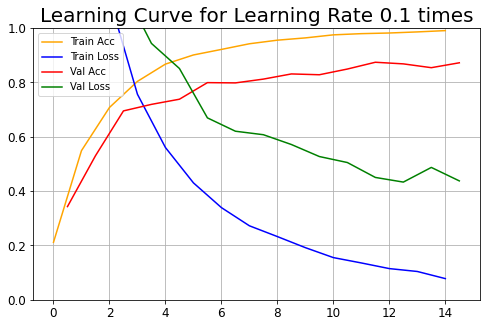

  

 For Learning Rate: 1.0 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)          

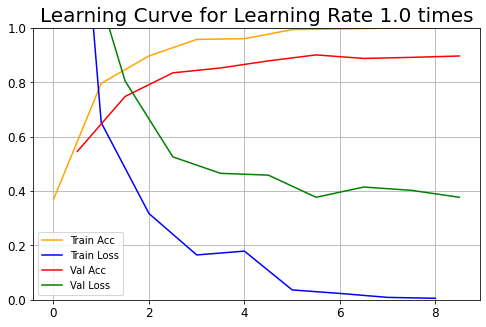

  

 For Learning Rate: 10.0 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)         

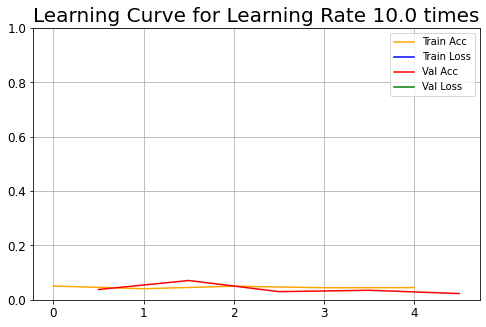

  

 For Learning Rate: 100.0 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)        

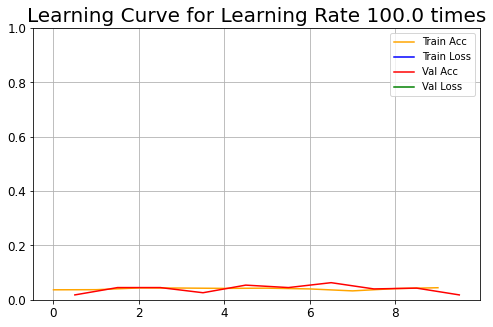

  

 Time to run: --- 460.8003001213074 seconds ---  


  [[0.0001, 0.874, 0.853], [0.001, 0.901, 0.893], [0.01, 0.071, 0.07], [0.1, 0.063, 0.042]] 


In [49]:
#CNN Learning rate
res_r=[]
hist = []
mode = []
start_time = time.time()
for lr in [0.1, 1.0, 10.0, 100.0]:
    print(color.PURPLE, color.BOLD,'\n\n For Learning Rate:',lr,color.END)
    valacc, testacc, history, model = do_all1(hiddensizes, actfn, optimizer, lr*learningrate, n_epochs, batch_size)
    plot_history(history,'Learning Curve for Learning Rate '+str(lr)+' times')
    res_r += [[lr*learningrate,valacc,testacc]]
    hist += [history]
    mode += [model]
print(color.RED,color.BOLD,"\n\n Time to run: --- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
print(color.PURPLE, color.BOLD,res_r,color.END)

<br /><b>OBSERVATION:</b> <br />
When we are selecting learning rate 0.1 and 1 times its working but as we select 10 and 100 times, we are not getting any results. It's because learning rate gets too high on these two values. 

### 2. Changing Number of Layers (Convolution Neural Network)

  

 For number of layers: 1 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1204248   
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 27.8534 - accuracy: 0.1668 - val_loss: 4.1242 - val_accuracy: 0.2570
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 1.6257 - accuracy: 0.5840 - val_loss: 1.8490 - val_accuracy: 0.4840
E

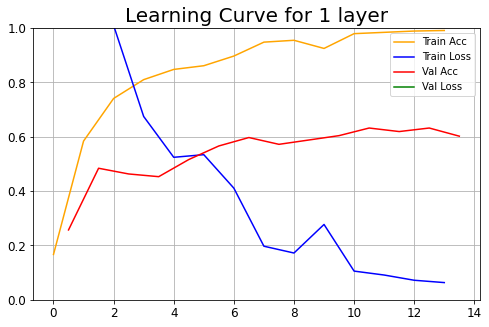

  

 For number of layers: 2 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [=============

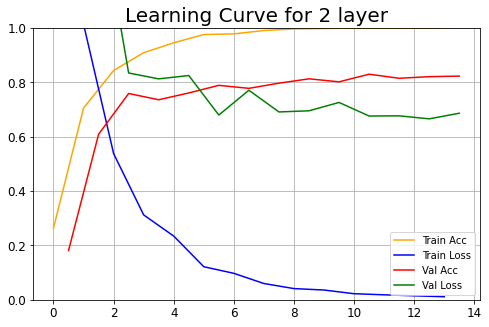

  

 For number of layers: 3 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)         

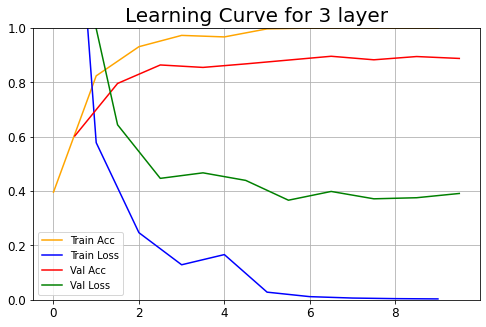

  

 Time to run model: --- 287.5848174095154 seconds ---  


  [[1, 0.632, 0.627], [2, 0.83, 0.805], [3, 0.896, 0.877]] 


In [50]:
#CNN Number of layers
res_l=[]
hist1 = []
mode1 = []
start_time = time.time()
for n in [1,2,3]:
    print(color.PURPLE, color.BOLD,'\n\n For number of layers:',n,color.END)
    clvalacc, cltestacc, clhistory, clmodel = do_all1(hiddensizes[:n], actfn, optimizer, learningrate, n_epochs, batch_size)
    plot_history(clhistory,'Learning Curve for '+ str(n) + ' layer')
    res_l += [[n,clvalacc,cltestacc]]
    hist1 += [clhistory]
    mode1 += [clmodel]
print(color.RED,color.BOLD,"\n\n Time to run model: --- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
print(color.PURPLE, color.BOLD,res_l,color.END)

<br /><b>OBSERVATION:</b><br />
For Layer 1 we are getting good results as loss is also converging but validation loss is above 1. When we using two layers we get better results as compared to previous one but still validation loss is high. When we are using all the three layers we are getting our best result.

## Exploring Grid (Convolution Neural Network)

### Changing both number of layers and learning rate at same time

  

 For number of layers:  1 and learning rate:  0.1 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_8 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1204248   
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 3.1354 - accuracy: 0.1872 - val_loss: 2.9072 - val_accuracy: 0.2170
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 2.1276 - accuracy: 0.4112 - val_loss: 2.2395 

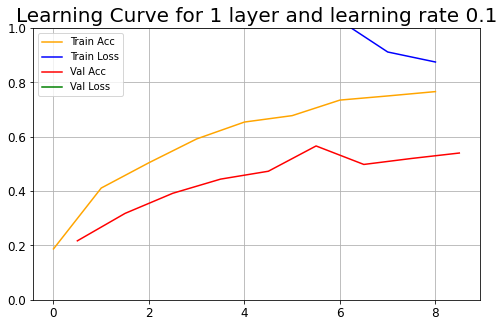

  

 For number of layers:  1 and learning rate:  1.0 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_9 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1204248   
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 21.6455 - accuracy: 0.1804 - val_loss: 3.6865 - val_accuracy: 0.2510
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 1.8688 - accuracy: 0.5664 - val_loss: 1.9151

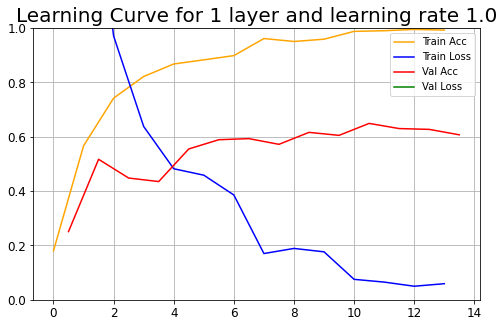

  

 For number of layers:  1 and learning rate:  10.0 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_10 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                1204248   
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 124.2964 - accuracy: 0.1960 - val_loss: 14.0640 - val_accuracy: 0.3180
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 6.1041 - accuracy: 0.6096 - val_loss: 8.

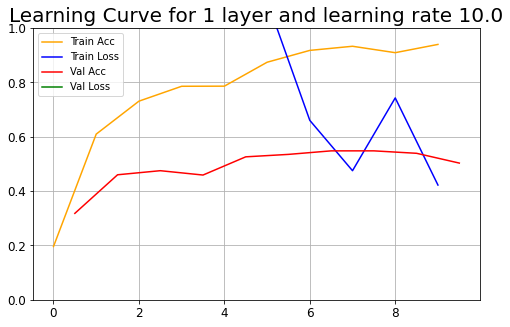

  

 For number of layers:  1 and learning rate:  100.0 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_11 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 24)                1204248   
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 3380.4945 - accuracy: 0.0500 - val_loss: 4435.2306 - val_accuracy: 0.0230
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 2948.7515 - accuracy: 0.0960 - val_l

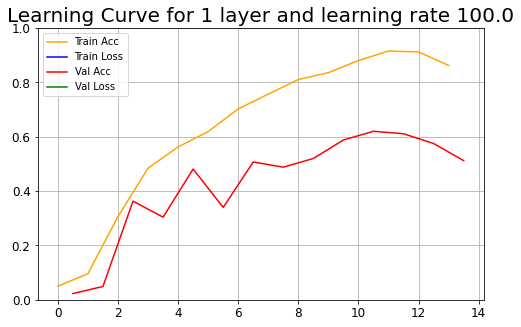

  

 For number of layers:  2 and learning rate:  0.1 
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten_12 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/10

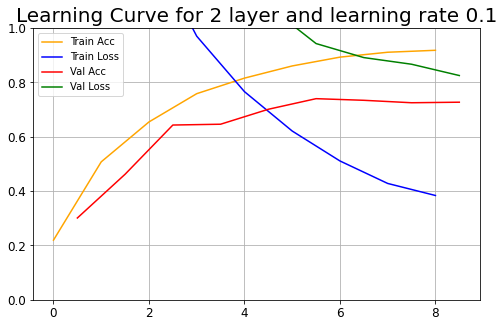

  

 For number of layers:  2 and learning rate:  1.0 
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten_13 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/10

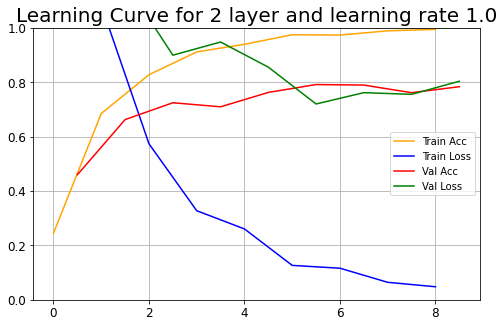

  

 For number of layers:  2 and learning rate:  10.0 
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten_14 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/1

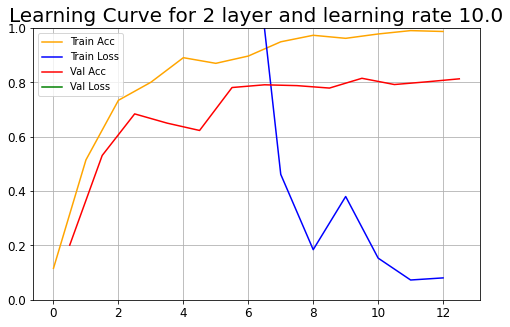

  

 For number of layers:  2 and learning rate:  100.0 
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/

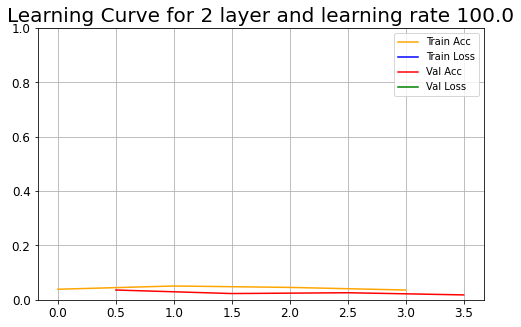

  

 For number of layers:  3 and learning rate:  0.1 
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_16 (Flatten)         (None, 12544)             0         
________________________________________________________________

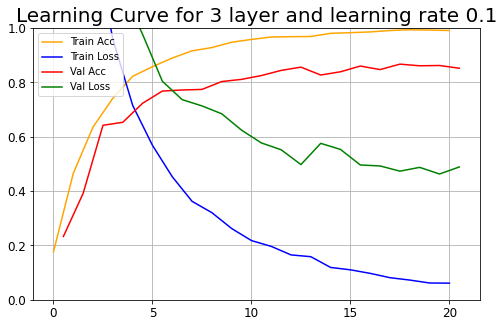

  

 For number of layers:  3 and learning rate:  1.0 
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_17 (Flatten)         (None, 12544)             0         
________________________________________________________________

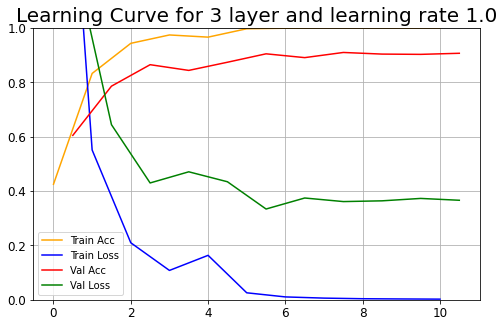

  

 For number of layers:  3 and learning rate:  10.0 
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_18 (Flatten)         (None, 12544)             0         
_______________________________________________________________

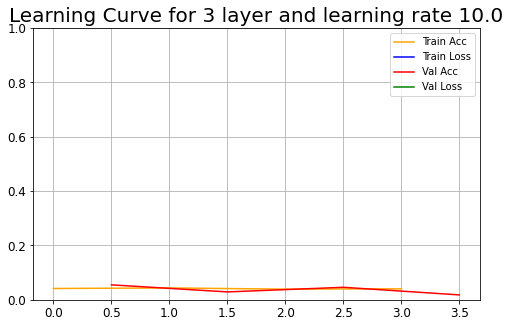

  

 For number of layers:  3 and learning rate:  100.0 
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_19 (Flatten)         (None, 12544)             0         
______________________________________________________________

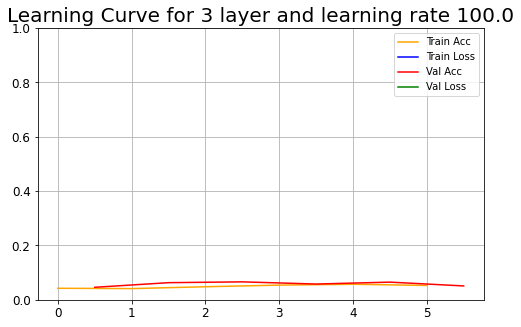

  

 Time to run model: --- 964.112048625946 seconds ---  


  [[1, 0.0001, 0.566, 0.569], [1, 0.001, 0.649, 0.641], [1, 0.01, 0.548, 0.563], [1, 0.1, 0.62, 0.613], [2, 0.0001, 0.74, 0.717], [2, 0.001, 0.792, 0.793], [2, 0.01, 0.815, 0.795], [2, 0.1, 0.036, 0.035], [3, 0.0001, 0.867, 0.86], [3, 0.001, 0.91, 0.906], [3, 0.01, 0.055, 0.055], [3, 0.1, 0.066, 0.073]] 


In [51]:
#CNN changing both
res_lrc=[]
hist2 = []
mode2 = []
start_time = time.time()
for n in [1, 2, 3]:
    for lr in [0.1, 1.0, 10.0, 100.0]:
        print(color.PURPLE, color.BOLD,'\n\n For number of layers: ',n,'and learning rate: ', lr ,color.END)
        valacc_c, testacc_c, history_c, model_c = do_all1(hiddensizes[:n], actfn, optimizer, lr*learningrate, n_epochs, batch_size)
        plot_history(history_c, 'Learning Curve for '+ str(n) + ' layer and learning rate '+ str(lr))
        res_lrc += [[n, lr*learningrate, valacc_c, testacc_c]]
        hist2 += [history_c]
        mode2 += [model_c]
print(color.RED,color.BOLD,"\n\n Time to run model: --- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
print(color.PURPLE, color.BOLD,res_lrc,color.END)

<br /><b>OBSERVATION:</b><br />
When we are using high learning rate that is either 10 and 100, we are not getting anything but for 0.1 and 1 there are significant results.
For Layer 1 we are getting good results as loss is also converging but validation loss is above 1. When we using two layers we get better results as compared to previous one but still validation loss is high. When we are using all the three layers we are getting our best result.

## Exploring Fully Connected Network

In [52]:
#Dense
def model_dense_factory1(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn, kernel_initializer=kernel_initializer))
    model.add(keras.layers.Dense(24, activation = "softmax"))   # always have 24 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"])
    return model

In [53]:
def do_all2(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    model = model_dense_factory1(hiddensizes, actfn, optimizer, learningrate)
    model.summary()
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = [early_stopping_cb] + further_callbacks,
                        validation_data=(X_cv, y_cv))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    return (max_val_acc, testres[1], history, model)

## Exploring change in one parameter at a time (Fully Connected)

### 1. Changing learning rate

  

 For Learning rate:  0.1 
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============

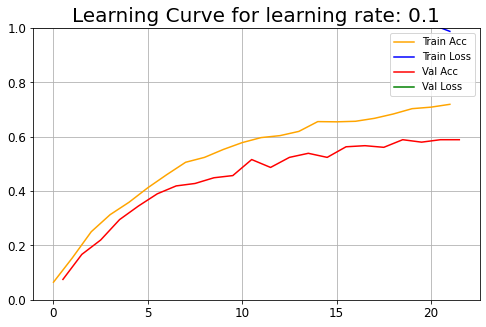

  

 For Learning rate:  1.0 
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_27 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============

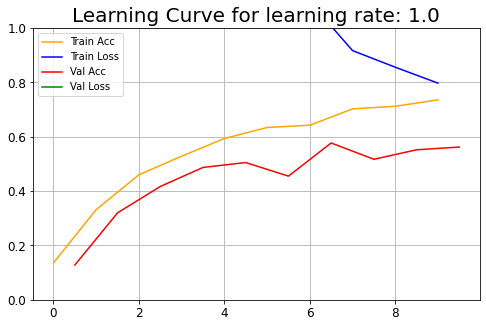

  

 For Learning rate:  10.0 
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_31 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [=============

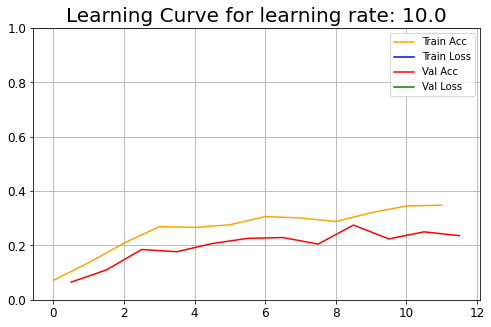

  

 For Learning rate:  100.0 
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_34 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_35 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [============

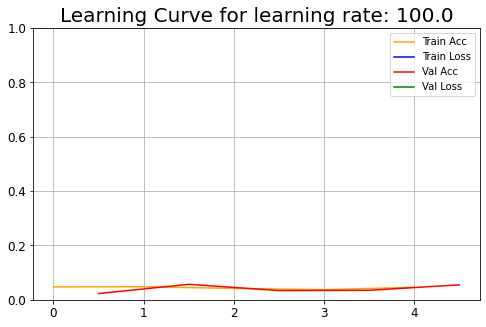

  

 Time to run model: --- 46.7857871055603 seconds ---  


  [[0.0001, 0.589, 0.593], [0.001, 0.577, 0.597], [0.01, 0.275, 0.271], [0.1, 0.057, 0.046]] 


In [54]:
#Dense Learning rate
res_rf = []
mode3 = []
histor3 = []
start_time = time.time()
for lr in [0.1, 1.0, 10.0, 100.0]:
    print(color.PURPLE, color.BOLD,'\n\n For Learning rate: ',lr,color.END)
    fvalacc, ftestacc, fhistory, fmodel = do_all2(hiddensizes, actfn, optimizer, lr*learningrate, n_epochs, batch_size)
    plot_history(fhistory, 'Learning Curve for learning rate: ' + str(lr))
    res_rf += [[lr*learningrate,fvalacc,ftestacc]]
    mode3 += [fmodel]
    histor3 += [fhistory]
print(color.RED,color.BOLD,"\n\n Time to run model: --- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
print(color.PURPLE, color.BOLD,res_rf,color.END)

<br /><b>OBSERVATION:</b><br />
We are getting results but as we are increasing the learning rate the scores are decreasing and at last it becomes zero when learning rate is 100

### 2. Changing number of layers (Fully Connected)

  

 For number of layers: 1 
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 24)                1560      
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 350us/sample - loss: 3.1015 - accuracy: 0.1192 - val_loss: 2.9213 - val_accuracy: 0.0820
Epoch 2/100
2500/2500 [==============================] - 1s 286us/sample - loss: 2.6264 - accuracy: 0.2340 - val_loss: 2.6062 - val_accuracy: 0.1990
Epo

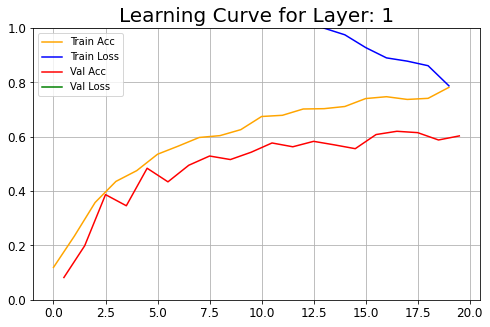

  

 For number of layers: 2 
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_40 (Dense)             (None, 24)                3096      
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 410us/sample - loss: 3.0782 - accuracy: 0.1224 - val_loss: 2.8786 - val_accuracy: 0.1120
Epoch 2/100
2500/250

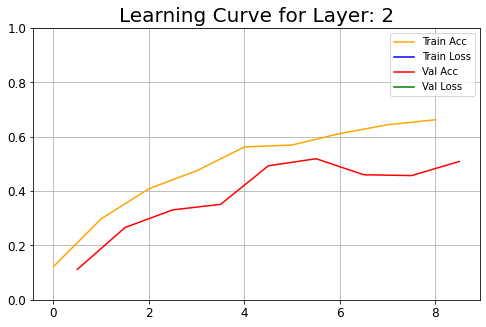

  

 For number of layers: 3 
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_43 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_44 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============

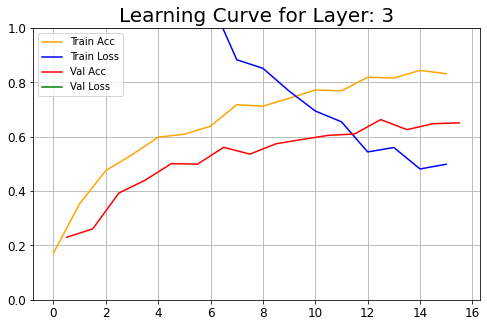

  

 Time to run model: --- 35.08755040168762 seconds ---  


  [[1, 0.62, 0.613], [2, 0.519, 0.53], [3, 0.663, 0.653]] 


In [55]:
#Dense Number of layers
res_lf=[]
mode4 = []
histor4 = []
start_time = time.time()
for n in [1, 2, 3]:
    print(color.PURPLE, color.BOLD,'\n\n For number of layers:',n,color.END)
    flvalacc, fltestacc, flhistory, flmodel = do_all2(hiddensizes[:n], actfn, optimizer, learningrate, n_epochs, batch_size)
    plot_history(flhistory, 'Learning Curve for Layer: ' + str(n))
    res_lf += [[n,flvalacc,fltestacc]]
    mode4 += [flmodel]
    histor4 += [flhistory]
print(color.RED,color.BOLD,"\n\n Time to run model: --- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
print(color.PURPLE, color.BOLD,res_lf,color.END)

<br /><b>OBSERVATION:</b><br />
When we used 1 layer then we are getting approx 0.6 as a result but as we increase the layer score decrease for layer 2 but again increase when we are using all the three layers.

## Exploring Grid (Fully Connected) : 

### Changing both hidden layer and learning rate at same time 

  

 For number of layers: 1  and learning rate:  0.1 
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_46 (Dense)             (None, 24)                1560      
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 396us/sample - loss: 3.2426 - accuracy: 0.0572 - val_loss: 3.1760 - val_accuracy: 0.0390
Epoch 2/100
2500/2500 [==============================] - 1s 228us/sample - loss: 3.1114 - accuracy: 0.0840 - val_loss: 3.1090 -

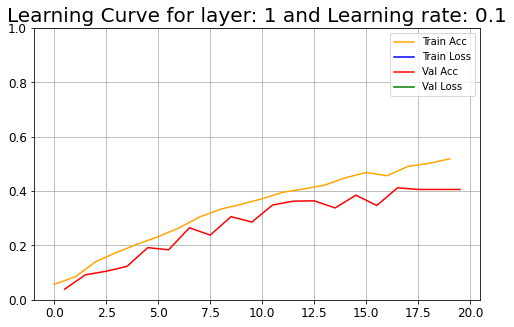

  

 For number of layers: 1  and learning rate:  1.0 
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_48 (Dense)             (None, 24)                1560      
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 354us/sample - loss: 3.1171 - accuracy: 0.0968 - val_loss: 2.8996 - val_accuracy: 0.1640
Epoch 2/100
2500/2500 [==============================] - 0s 183us/sample - loss: 2.6143 - accuracy: 0.2484 - val_loss: 2.5704 -

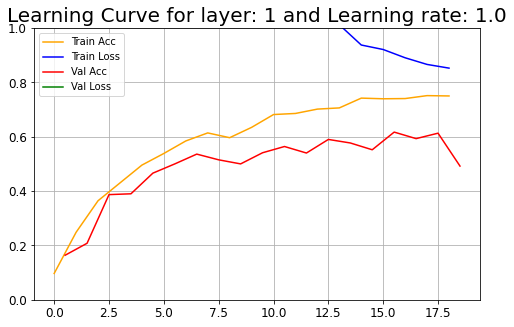

  

 For number of layers: 1  and learning rate:  10.0 
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_50 (Dense)             (None, 24)                1560      
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 333us/sample - loss: 3.7872 - accuracy: 0.0744 - val_loss: 3.0470 - val_accuracy: 0.0730
Epoch 2/100
2500/2500 [==============================] - 1s 309us/sample - loss: 2.7920 - accuracy: 0.1580 - val_loss: 2.8470 

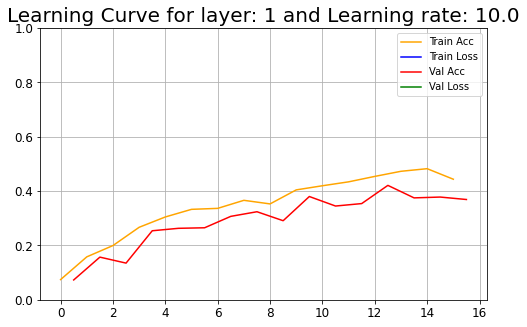

  

 For number of layers: 1  and learning rate:  100.0 
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_52 (Dense)             (None, 24)                1560      
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 431us/sample - loss: 17.9054 - accuracy: 0.0452 - val_loss: 3.8421 - val_accuracy: 0.0230
Epoch 2/100
2500/2500 [==============================] - 1s 215us/sample - loss: 3.6432 - accuracy: 0.0380 - val_loss: 4.090

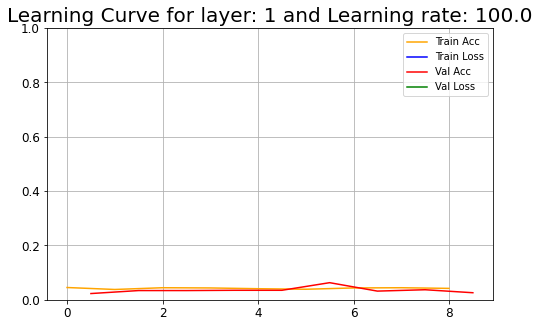

  

 For number of layers: 2  and learning rate:  0.1 
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_54 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_55 (Dense)             (None, 24)                3096      
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 450us/sample - loss: 3.2526 - accuracy: 0.0496 - val_loss: 3.2027 - val_accuracy: 0.

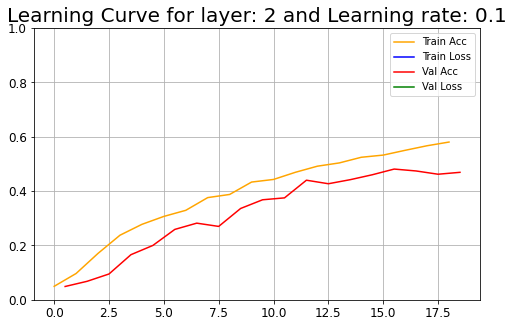

  

 For number of layers: 2  and learning rate:  1.0 
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_58 (Dense)             (None, 24)                3096      
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 426us/sample - loss: 3.1206 - accuracy: 0.1156 - val_loss: 2.9649 - val_accuracy: 0.

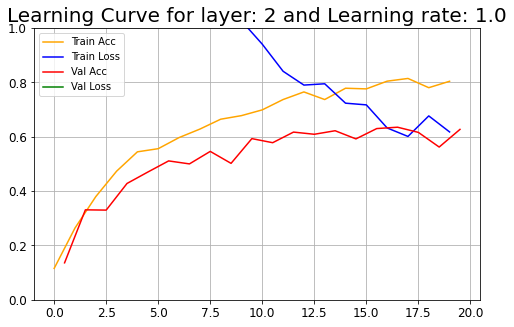

  

 For number of layers: 2  and learning rate:  10.0 
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_60 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_61 (Dense)             (None, 24)                3096      
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 446us/sample - loss: 3.5838 - accuracy: 0.0648 - val_loss: 2.9178 - val_accuracy: 0

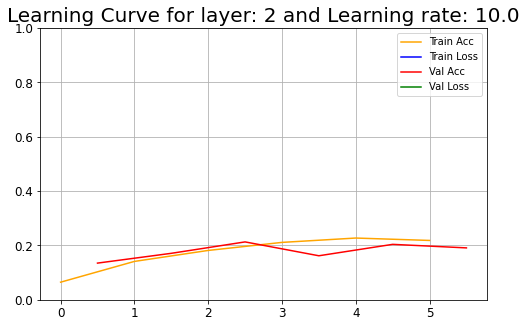

  

 For number of layers: 2  and learning rate:  100.0 
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_63 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_64 (Dense)             (None, 24)                3096      
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 441us/sample - loss: 41.2258 - accuracy: 0.0384 - val_loss: 4.0808 - val_accuracy:

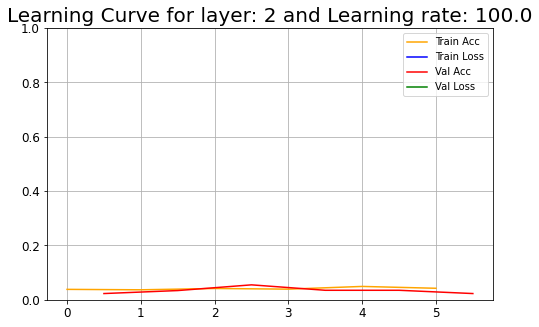

  

 For number of layers: 3  and learning rate:  0.1 
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_67 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_68 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100


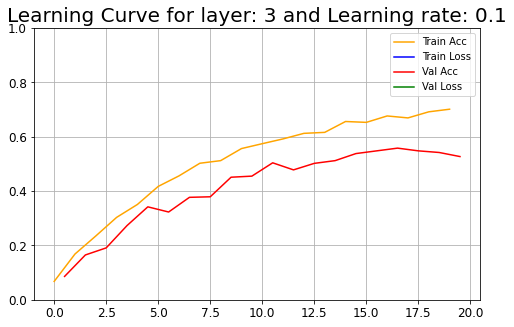

  

 For number of layers: 3  and learning rate:  1.0 
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_70 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_71 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_72 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100


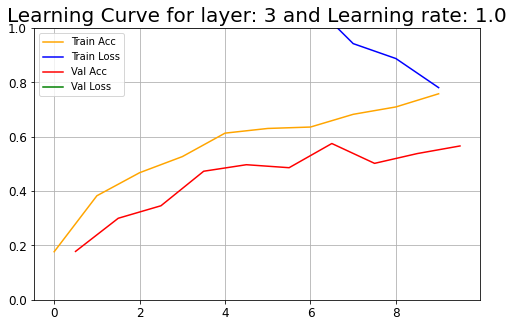

  

 For number of layers: 3  and learning rate:  10.0 
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_74 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_75 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_76 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/100

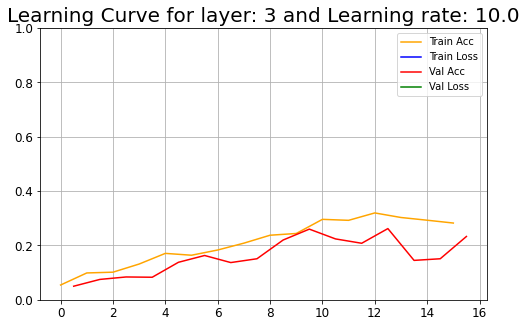

  

 For number of layers: 3  and learning rate:  100.0 
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_79 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_80 (Dense)             (None, 24)                6168      
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 1000 samples
Epoch 1/10

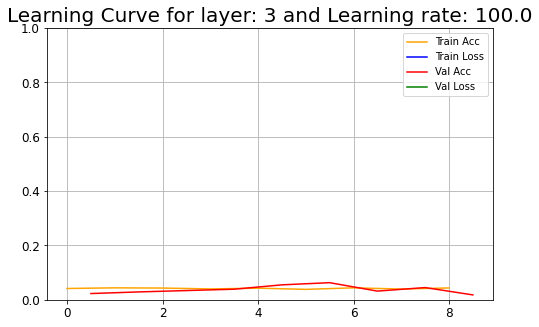

  

 Time to run model: --- 133.7352533340454 seconds ---  


  [[1, 0.0001, 0.412, 0.42], [1, 0.001, 0.617, 0.621], [1, 0.01, 0.421, 0.363], [1, 0.1, 0.063, 0.042], [2, 0.0001, 0.481, 0.459], [2, 0.001, 0.635, 0.639], [2, 0.01, 0.213, 0.208], [2, 0.1, 0.055, 0.055], [3, 0.0001, 0.558, 0.542], [3, 0.001, 0.575, 0.57], [3, 0.01, 0.262, 0.269], [3, 0.1, 0.063, 0.042]] 


In [56]:
#changing both hidden layer and learning rate  
res_lrf=[]
mode5 = []
histor5 = []
start_time = time.time()
for n in [1, 2, 3]:
    for lr in [0.1, 1.0, 10.0, 100.0]:
        print(color.PURPLE, color.BOLD,'\n\n For number of layers:',n,' and learning rate: ',lr,color.END)
        valacc_f, testacc_f, history_f, discard_f = do_all2(hiddensizes[:n], actfn, optimizer, lr*learningrate, n_epochs, batch_size)
        plot_history(history_f, 'Learning Curve for layer: '+str(n)+' and Learning rate: '+str(lr))
        res_lrf += [[n, lr*learningrate, valacc_f, testacc_f]]
        mode5 += [flmodel]
        histor5 += [flhistory]
print(color.RED,color.BOLD,"\n\n Time to run model: --- %s seconds ---" % (time.time() - start_time),color.END,'\n\n')
print(color.PURPLE, color.BOLD,res_lrf,color.END)

<br /><b>OBSERVATION:</b><br />
We are getting best results when we have low value of learning rate and high number of layers.

# RESULTS 

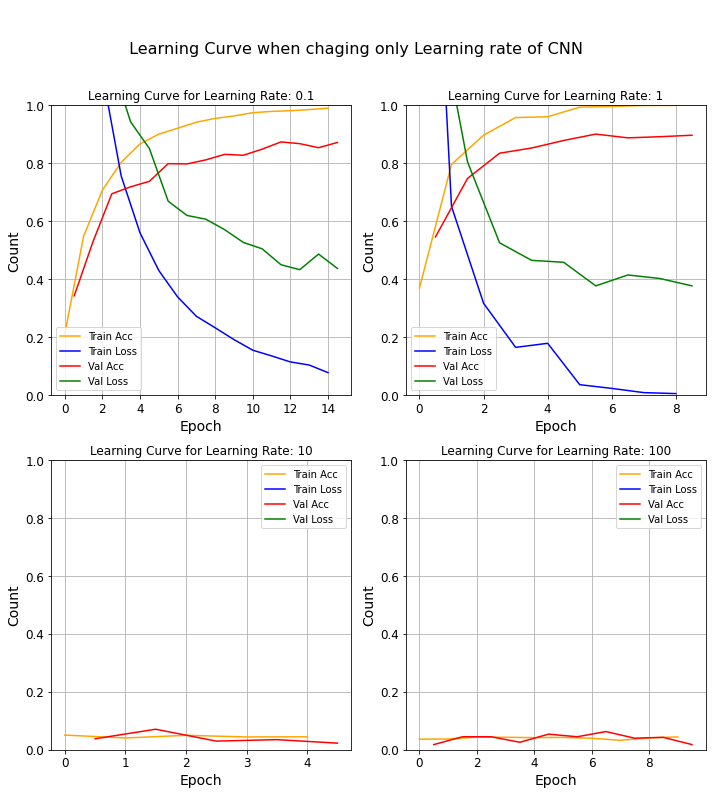

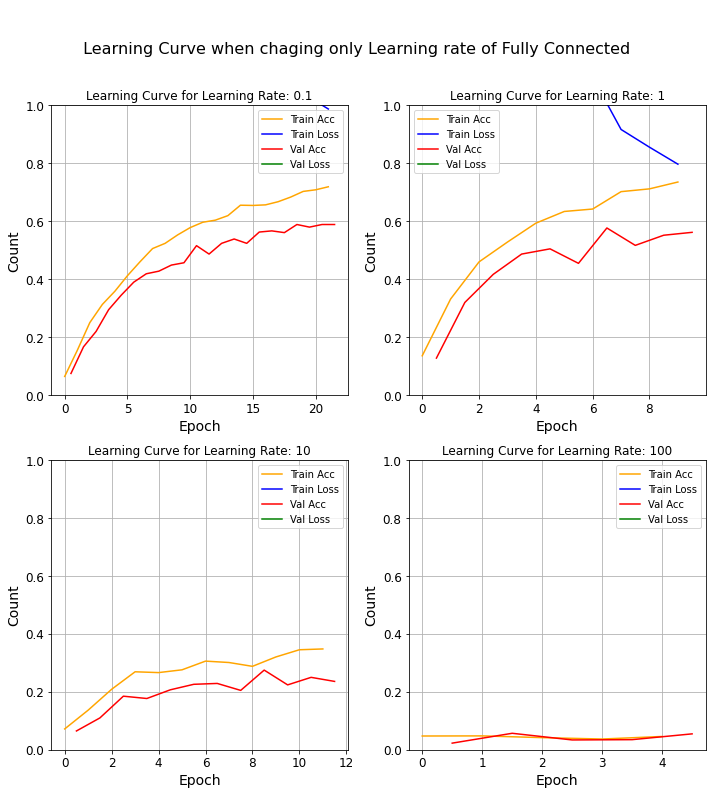

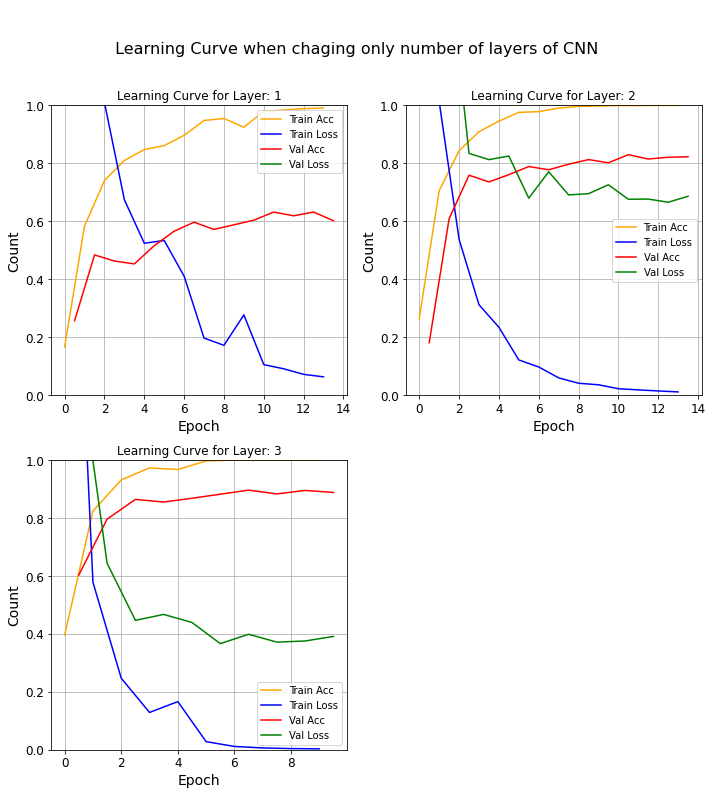

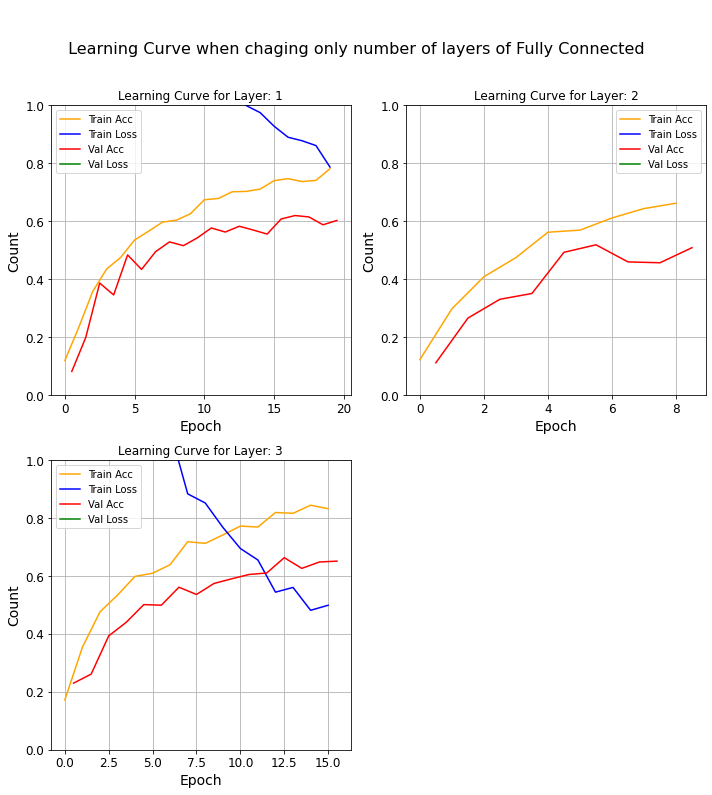

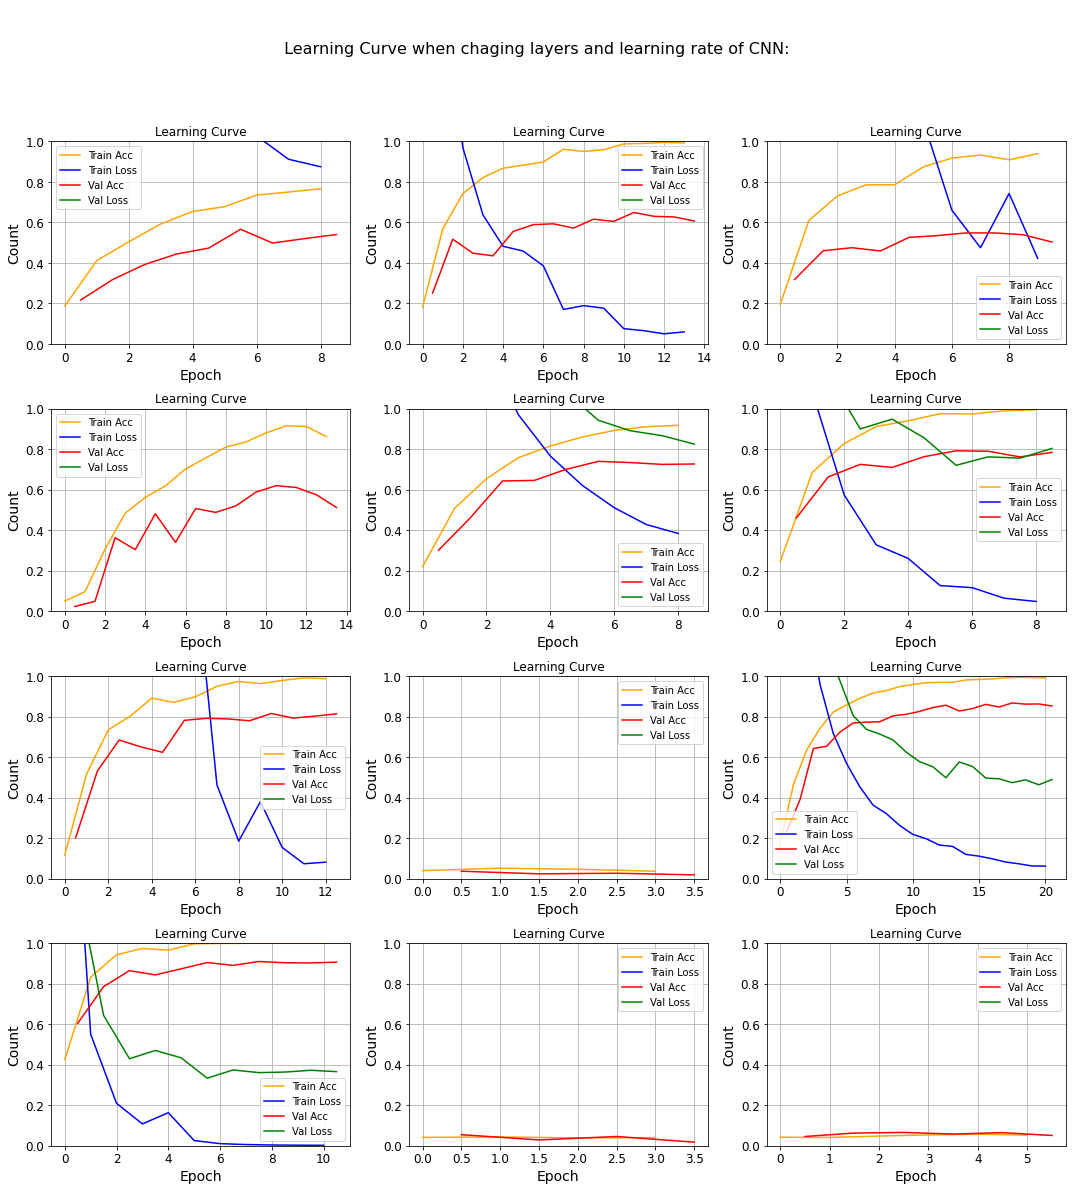

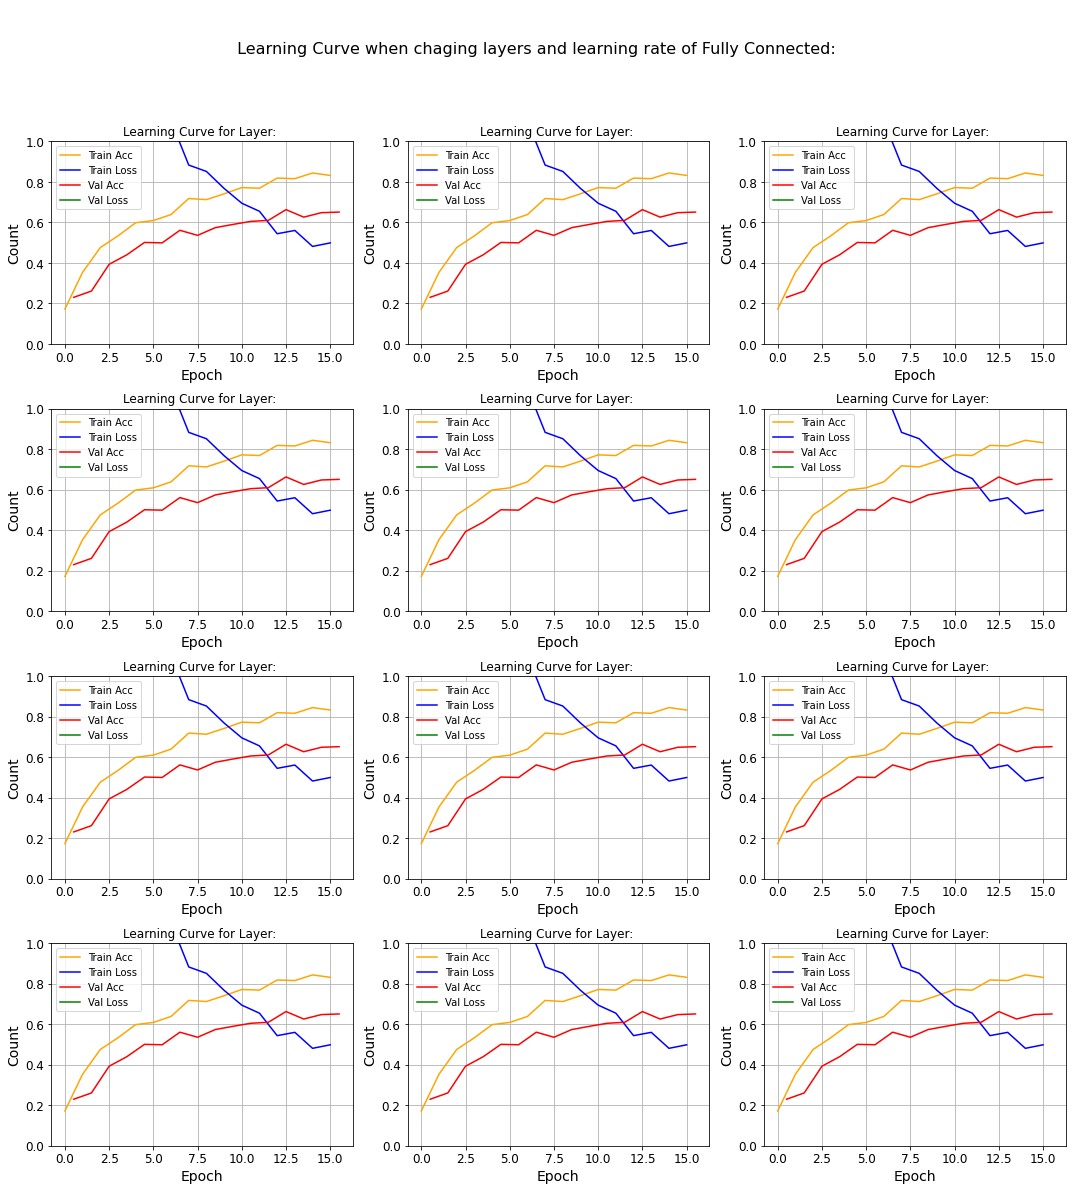

In [57]:
#plot when changing only learning rate in cnn
plt.figure(figsize=(10,10))
llrr = [0.1,1,10,100]
plt.suptitle('\n\n Learning Curve when chaging only Learning rate of CNN \n\n', size=16, y=1.1)
for i in range(0,4):
    plt.subplot(2,2,i+1)
    n = len(hist[i].history['accuracy'])
    plt.plot(np.arange(0,n),hist[i].history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),hist[i].history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,hist[i].history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,hist[i].history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.title('Learning Curve for Learning Rate: ' + str(llrr[i]), fontsize=12)
    plt.xlabel('Epoch')
    plt.ylabel('Count')
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.tight_layout()
plt.show() 
#plot when changing only learning rate in fully connected
plt.figure(figsize=(10,10))
llrr = [0.1,1,10,100]
plt.suptitle('\n\n Learning Curve when chaging only Learning rate of Fully Connected \n\n', size=16, y=1.1)
for i in range(0,4):
    plt.subplot(2,2,i+1)
    n = len(histor3[i].history['accuracy'])
    plt.plot(np.arange(0,n),histor3[i].history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),histor3[i].history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,histor3[i].history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,histor3[i].history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Count')
    plt.title('Learning Curve for Learning Rate: ' + str(llrr[i]), fontsize=12)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.tight_layout()
plt.show() 
#plot when changing only layers in cnn
plt.figure(figsize=(10,10))
layer = [1,2,3]
plt.suptitle('\n\n Learning Curve when chaging only number of layers of CNN \n\n', size=16, y=1.1)
for i in range(0,3):
    plt.subplot(2,2,i+1)
    n = len(hist1[i].history['accuracy'])
    plt.plot(np.arange(0,n),hist1[i].history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),hist1[i].history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,hist1[i].history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,hist1[i].history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Count')
    plt.title('Learning Curve for Layer: ' + str(layer[i]), fontsize=12)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.tight_layout()
plt.show()
#plot when changing only layers in full connected
plt.figure(figsize=(10,10))
layer = [1,2,3]
plt.suptitle('\n\n Learning Curve when chaging only number of layers of Fully Connected \n\n', size=16, y=1.1)
for i in range(0,3):
    plt.subplot(2,2,i+1)
    n = len(histor4[i].history['accuracy'])
    plt.plot(np.arange(0,n),histor4[i].history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),histor4[i].history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,histor4[i].history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,histor4[i].history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Count')
    plt.title('Learning Curve for Layer: ' + str(layer[i]), fontsize=12)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.tight_layout()
plt.show()
#plot when changing both learning rate and layers in cnn
plt.figure(figsize=(15,15))
layer = [1,2,3]
plt.suptitle('\n\n Learning Curve when chaging layers and learning rate of CNN: \n\n', size=16, y=1.1)
for i in range(0,12):
    plt.subplot(4,3,i+1)
    n = len(hist2[i].history['accuracy'])
    plt.plot(np.arange(0,n),hist2[i].history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),hist2[i].history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,hist2[i].history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,hist2[i].history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Count')
    plt.title('Learning Curve' , fontsize=12)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.tight_layout()
plt.show()
#plot when changing both learning rate and layers in fully connected
plt.figure(figsize=(15,15))
layer = [1,2,3]
plt.suptitle('\n\n Learning Curve when chaging layers and learning rate of Fully Connected: \n\n', size=16, y=1.1)
for i in range(0,12):
    plt.subplot(4,3,i+1)
    n = len(histor5[i].history['accuracy'])
    plt.plot(np.arange(0,n),histor5[i].history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),histor5[i].history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,histor5[i].history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,histor5[i].history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Count')
    plt.title('Learning Curve for Layer: ', fontsize=12)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.tight_layout()
plt.show()

<h3>From all the graphs shown above the best results we get in CNN when number of layers are 3 and learning rate is 0.1 times.</h3>

### Question 3.4

Once you have performed your systematic optimisation, choose the best network from all of your results.
- Explain why you chose this particular network.
- Were there one or more other networks with very similar performance?  
- If so, did they share particular design features (e.g. size, number of elements, etc)?

# Answer question 3.4 here (no code required)

##### I have chose CNN and fully connected network both and divide them into three categories:
1. Only changing learning rate
2. Only changing number of hidden layers 
3. Changing both learning rate and hidden layer (grid)

From each of them I have selected the best method we are getting as a result and from all the three categories we can see that fully connected does not perform well. 

If we observe CNN in all the three categories, we can see that for the first category it train accuracy reaches top in less number of epochs but in other two categories it is similar but we are getting best learning curve when we are considering the grid search. So CNN have similar performance in last categories as in both of them the number of hidden layer is 3. 

If we observe fully connected it is different in every category but if we consider only val and train accuracy then it's similar in first and third category so that means when we keeping the learning rate to 0.001 we are getting better results but with change in number of hidden layers we are not getting good results. 

So finally we have selected the CNN of category 3 means changing both learning rate and layers as the best one because it changing the learninig rate to 0.0001 and the number of hidden layers to 3. This is giving the best results while considering both. It gives significant improvement in training and validation accuracy both is above 0.8 and there is significant decrease in both losses. 


### 3.5 Show Results 
Take the best network and show the confusion matrix for its predictions.

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_39 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_81 (Dense)             (None, 24)              

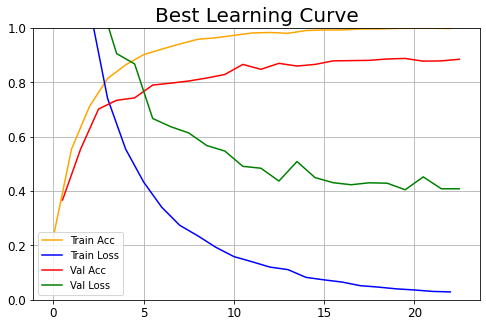

  Time to run the model: -----%s seconds ---- 306.23392152786255 


In [58]:
start_time = time.time()
best_valacc, best_testacc, best_history, best_model = do_all1(hiddensizes, actfn, optimizer, 0.1*learningrate, n_epochs, batch_size)
plot_history(best_history, "Best Learning Curve")
print(color.PURPLE,color.BOLD,'Time to run the model: -----%s seconds ----', time.time() - start_time, color.END)

In [59]:
# Predicting the labels 
yy_pred = best_model.predict_classes(X_test)
score = best_model.evaluate(X_test, y_test)
print(color.PURPLE,color.BOLD,'Scores: ',score,color.END)

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4286 - accuracy: 0.8790
  Scores:  [0.4286325373649597, 0.879] 


[[47  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 43  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  2  0  0  0  0  0  0  0  3  0  0  3  0  0  0  1  0]
 [ 0  0  0  0  0  0  1 58  0  0  3  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  3  0  0  0  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0 35  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 6  0  0  2  0  0  0  0  0  0  0  2 32  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0

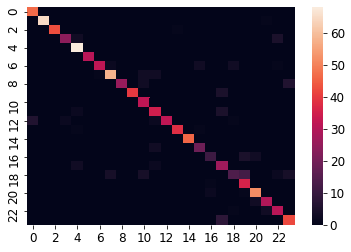

In [60]:
#printing confusion matrix
cm = confusion_matrix(y_test,yy_pred)
print(cm)
sns.heatmap(cm)

In [61]:
# Multi Class ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
  #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    fpr = {}
    tpr = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        fpri, tpri, _ = roc_curve(new_actual_class, new_pred_class)
        roc_auc_dict[per_class] = roc_auc
        fpr[per_class] = fpri[1]
        tpr[per_class] = tpri[1]
    return (roc_auc_dict, fpr, tpr)

In [62]:
#converting all to dataframe
lr_roc_auc_multiclass, fpr, tpr = roc_auc_score_multiclass(y_test, yy_pred)
AUC_score = pd.DataFrame(lr_roc_auc_multiclass.items()) 
FPR_value = pd.DataFrame(fpr.items())
TPR_value = pd.DataFrame(tpr.items())

### Question 3.6
 - What class is misclassified the most, and what class is it most typically misclassified as?
 - Give the class numbers and show example images of these.

In [63]:
mc = [0] * 24
for n in range(1000):
    if(y_test.iloc[n] != yy_pred[n]):
        mc[y_test.iloc[n]] += 1
print(mc)
mc = pd.DataFrame(mc)
mc.columns = {'Missclass'}
mc = mc.rename_axis('ID')
mc = mc.sort_values(by='Missclass', ascending = False)
mc.head(5)

[0, 1, 1, 8, 0, 0, 9, 7, 9, 5, 0, 7, 11, 2, 0, 3, 8, 5, 26, 1, 3, 3, 4, 8]


,Missclass
ID,
18,26
12,11
6,9
8,9
16,8


In [64]:
# printing the most missclassified letter
mc_l = mc.index.tolist()
print(color.PURPLE,color.BOLD,'Mostly Missclassified Letter is: ',color.END)
print(color.PURPLE,color.BOLD,class_names[mc_l[0]], color.END)

  Mostly Missclassified Letter is:  
  T 


### So the most missclassified is Letter T 
#### We have also calculated the ROC and AUC score so we can verify the missclassification based on that also.

In [65]:
# rearranging to get the most misclassified at the the top
low = AUC_score.sort_values(by=1, ascending=True)

In [66]:
# code here needed to investigate question 3.6
print(color.PURPLE+color.BOLD+'\n\nThe most misclassified class: '+color.END)
print(low.iloc[0,0])
print(color.PURPLE+color.BOLD+'\n\nThe letter mostly misclassified is: ' +color.END)
print(color.PURPLE,color.BOLD,class_names[low.iloc[0,0]],color.END)



The most misclassified class: 
18


The letter mostly misclassified is: 
  T 


In [67]:
#count of missclassification for plotting the curve
count_mc = mc.iloc[0]

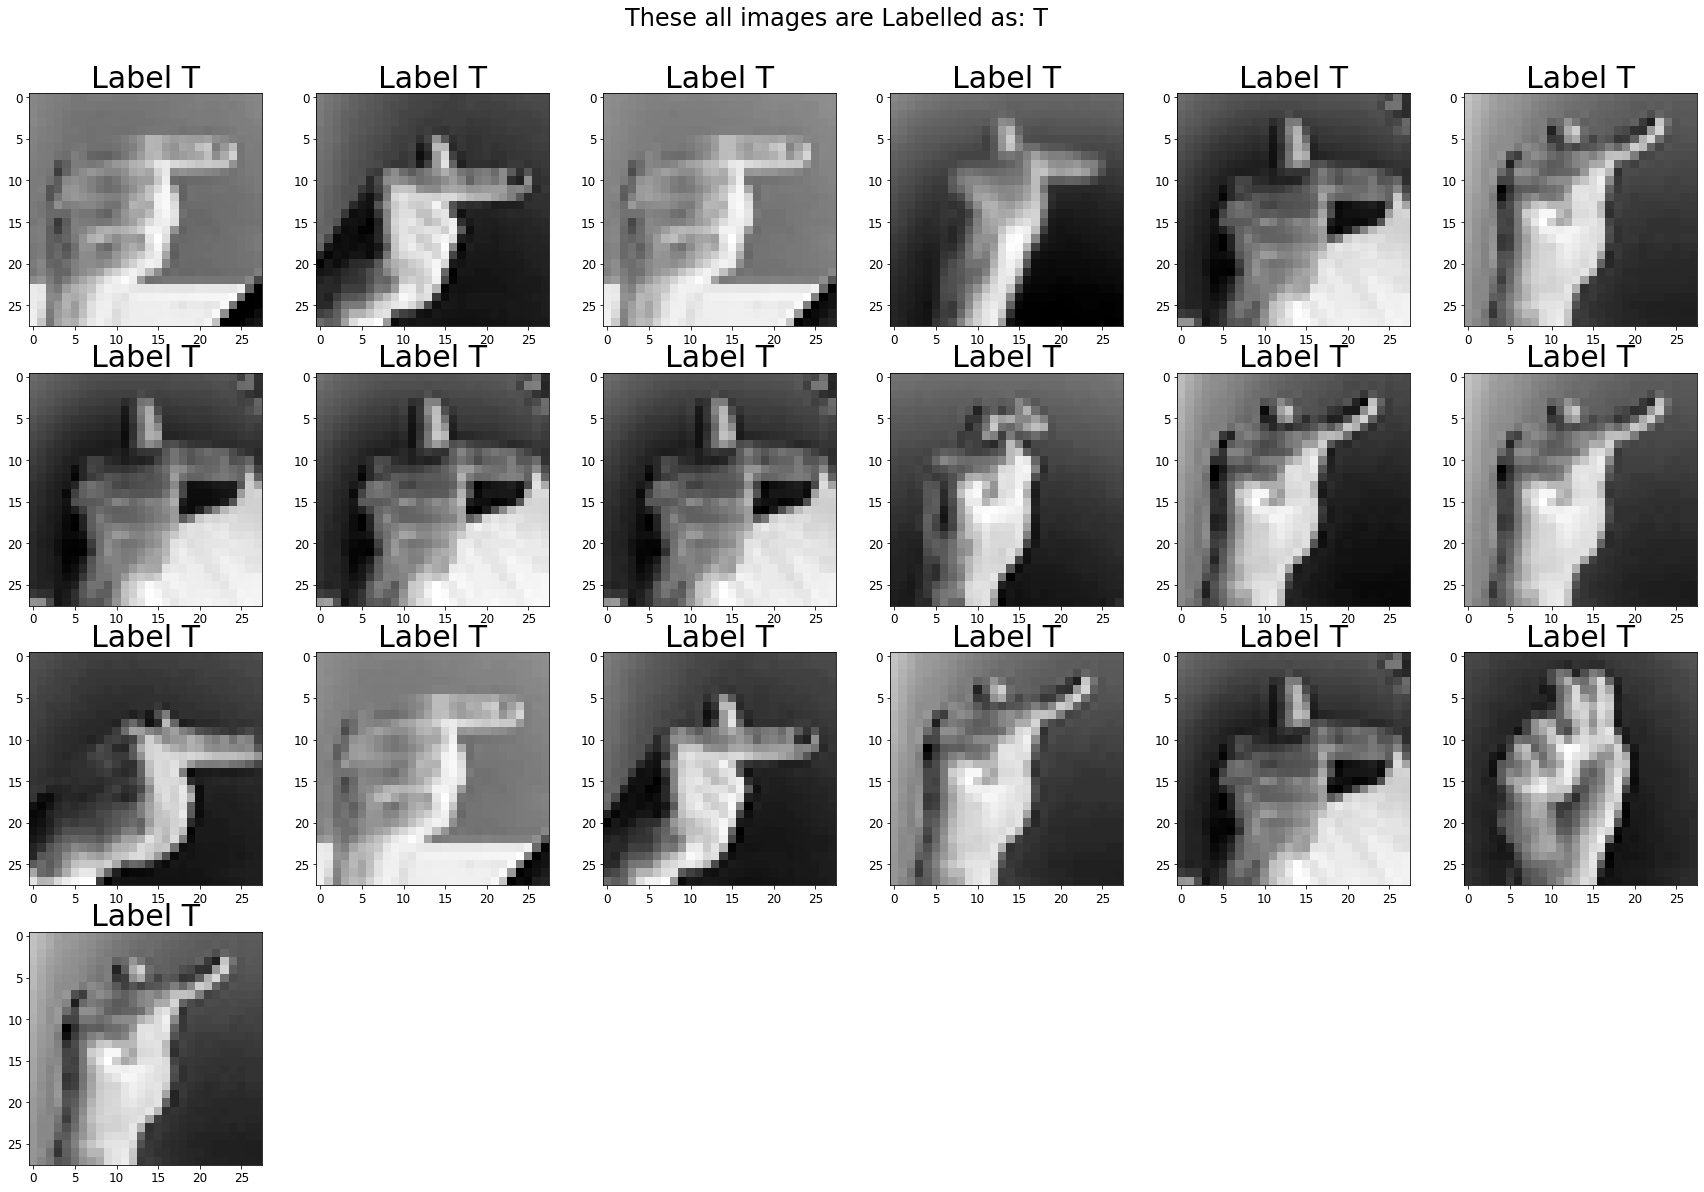

In [68]:
plt.figure(figsize=(30,30))
count = 0
plt.suptitle('These all images are Labelled as: '+str(class_names[mc_l[0]]), y=0.92, fontsize=24)
for i in range(0,1000):
    if (yy_pred[i]==mc_l[0]):
        plt.subplot(6,6,count+1)
        img = X_test[i,:]
        plt.title('Label '+class_names[yy_pred[i]], fontsize=30)
        img = tf.reshape(img, shape=[28,28])
        plt.imshow(img,cmap='Greys')
        count = count + 1 

## Answer question 3.6 here (text answer to questions - separate from the code above)

The maximum number of misclassification is from class number 18 and that is 'T' there are total 16 values as misclassification, so we have plotted all the images that are labeled as 'T' in our prediction.
There are differet type of images that means some of the images are misclassified. 

Original American Sign fot this is:

<img src="https://i.ibb.co/f1kZMBX/T.png" alt="T" border="0">
<img src="https://i.ibb.co/PWxWPxM/TTT.png" alt="TTT" border="0">
<img src="https://i.ibb.co/zsnmq4R/TT.png" alt="TT" border="0">

which can be seen in the above printed images which are labelled as 'T' and all the other which can be we see above are misclassified.


### Question 3.7
 - Summarise (in about 2-3 sentences) what you found out about the tuning and model comparisons that you have done in this section.
 - What aspects (if any) do you think might need to be modified for other problems (e.g. those with much larger datasets)? 

# Answer question 3.7 here (no code required)

In the above models we have applied three different approches that are changing only learning rate , changing only hidden layer, changing both. We have observed different results for both fully conncted network and CNN. We found that CNN performed well. It keeps on increasing validation accuracy when increase the number of layers or inclreasing the complexity of the network. Using large value of learning rate just overshooting in the model so they are very bad parameters. 

For the large dataset there might be some issue with overfitting we have used early stopping but we could use regualrisation l1/l2 in future. 
For the smaller dataset we could just add on the layer to extract the features from image in depth. This will increase the complexity of the network .
In the case of large dataset we could also limit the number of layers in network as if we increase the number of layers it could make the network complex and overfit the data
In this model we have taken only 2500 out of large dataset for training and cross validation is taken from test data but in general real life scenario we prefer to take the validation set from the train data only. There might be some cases in which we do not know the labels of test data so we could not use that in validation. 

***

## 4. Free Choice Element (10%)

In this section you can choose to investigate **just one** of the following options for improving the classification performance. Make sure that you explain your process and show appropriate results. Again, the final results are not that important - it is the process that counts.

Options are:
 - Implement new layers such as Dropout and BatchNormalization (see chapter 11 of Géron)
 - Try alternative and deeper CNN layouts, varying the number of Conv2D and MaxPooling layers and their ordering
 - Investigate the effects of larger networks, as well as changing at least one of the following: optimiser, activation function, batch size and/or training set size
 - Create an Ensemble of different networks and investigate the performance
 - Explore a different style of deep learning network (e.g. ResNet - see chapter 14 of Géron)
 
Report your findings and show the final results.

In [69]:
# using one-hot enoding
y_ttrain = label_binarizer.fit_transform(y_train)
y_cvv = label_binarizer.fit_transform(y_cv)
y_ttest = label_binarizer.fit_transform(y_test)
num_classes = 24

In [70]:
# creating model 64-128-512
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 3, 3, 512)       

In [71]:
# using different parameters
model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 20 
batch_size = 50

In [72]:
#Data augmentation to improve the accuracy
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [73]:
start_time = time.time()
history = model.fit(datagen.flow(X_train,y_ttrain, batch_size=batch_size),epochs = epochs, validation_data = (X_cv,y_cvv), steps_per_epoch=X_train.shape[0] // batch_size)
print('\n Time to run model: ---- %s ----', time.time() - start_time)

  ...
    to  
  ['...']
Train for 50 steps, validate on 1000 samples
Epoch 1/20
50/50 [==============================] - 26s 529ms/step - loss: 3.3057 - accuracy: 0.0508 - val_loss: 3.1854 - val_accuracy: 0.0350
Epoch 2/20
50/50 [==============================] - 26s 523ms/step - loss: 3.1868 - accuracy: 0.0576 - val_loss: 3.1879 - val_accuracy: 0.0340
Epoch 3/20
50/50 [==============================] - 26s 524ms/step - loss: 3.1478 - accuracy: 0.0736 - val_loss: 3.0479 - val_accuracy: 0.0890
Epoch 4/20
50/50 [==============================] - 26s 517ms/step - loss: 2.9726 - accuracy: 0.1044 - val_loss: 2.8747 - val_accuracy: 0.1380
Epoch 5/20
50/50 [==============================] - 26s 518ms/step - loss: 2.8421 - accuracy: 0.1344 - val_loss: 2.7037 - val_accuracy: 0.1530
Epoch 6/20
50/50 [==============================] - 26s 519ms/step - loss: 2.7224 - accuracy: 0.1736 - val_loss: 2.5817 - val_accuracy: 0.1680
Epoch 7/20
50/50 [==============================] - 26s 515ms/step - los

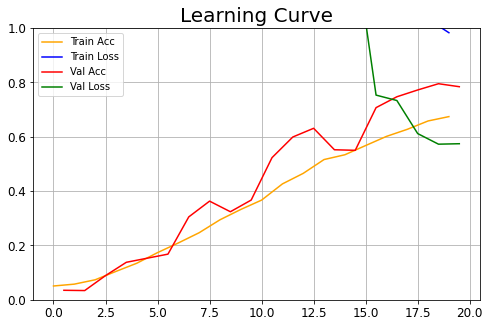

In [74]:
plot_history(history, 'Learning Curve')

In [75]:
score = model.evaluate(X_test, y_ttest)
print(color.RED,color.BOLD,'Scores: ',score,color.END)

1000/1000 [==============================] - 3s 3ms/sample - loss: 0.5704 - accuracy: 0.7910
  Scores:  [0.5704313216209411, 0.791] 


<h4> Part 4 Results and Explaination: </h4>
<b>Process followed for this part is just for learning and analyzing purposes as stated "results not matter process matters"</b><br /><br />
In the last part of the Assignment Part 4 I have created a pipeline in which first I converted all the labels to label encoder using one-hot encoding technique. For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.


Then I have used Data Augmentation mage data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

After all these process I have used the layers 64-128-512 to make the network complex, so that we can analyse the time and other parameters. 

Why validation accuracy is greater than training accuracy?<br />
There are a number of reasons this can happen.You do not shown any information on the size of the data for training, validation and test. If the validation set is to small it does not adequately represent the probability distribution of the data. If your training set is small there is not enough data to adequately train the model. Also your model is very basic and may not be adequate to cover the complexity of the data. A drop out of 50% is high for such a limited model. It will be more than adequate for even very complex data relationships. Once that works then you can be confident in the data and build your own model if you wish. Fact is validation loss and accuracy do not have real meaning until your training accuracy gets reasonably high say 85%.

<b>So when we see the results we can see that not every time complex network gives better results </b>

***

<h3>REFERENCES</h3><br />
Most of the references are taken from <b>BOOK: DEEP LEARNING (IAN GOODFELLOW, YOSHUA BENGIO, AARON COURVILLE)</b> and <b> Workshop: 8-12. </b><br />
Some of the references are taken from various sources of the internet.<br />
Some of the references are taken from the discussion board and lecture videos and slides.<br />
All the images were included from google images and books.<br />
Some of the things like creating class for print etc. are done for learning purposes only. <br />